# **MACHINE LEARNING: BIKE SHARING CUSTOMER PREDICTION MODEL**

This full dataset can be accessed through Kaggle [here](https://www.kaggle.com/competitions/bike-sharing-demand/data).  
The dataset timeframe is ranging from 2011 to 2012.

**CONTENTS**  
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modelling
5. Conclusion
6. Recommendation
---

# **Business Problem Understanding**

**CONTEXT**  
Capital Bikeshare, which was launched on September 20, 2010, is a prominent bike-sharing program operating in the Washington, D.C. metropolitan area. It offers an innovative transportation solution by providing a network of bicycles for short-term rentals. Capital Bikeshare enables residents and visitors to conveniently rent bikes from numerous docking stations spread across the city. Users can check out a bike from one station and return it to any other station within the system, making it a flexible mode of transportation for commuting, leisurely rides, or exploring the city's attractions. By promoting sustainable and healthy transportation options, Capital Bikeshare has become an integral part of the D.C. community. It has been running since its launch and it continues to provide its bike-sharing services, offering an eco-friendly way to get around the city while reducing traffic congestion and promoting a greener environment.

**PROBLEM STATEMENT**  
For business, entering a new cycle can be challenging as they need to prepare what will coming in the way. The challenge risk can be minimized by doing forecast / prediction of many aspects, for this case, it's number of total customers.

Capital Bikeshare is now entering new year cycle and expanding, into 2013. Business Strategic team needs a forecast about coming total customers. They want to predict the growth in 2013 to make sure the operational needs meets the demand. They need to know the forecast of total customers. By predicting it, for example, they can prepare how many bike should be provided in order to meet the demand. They also want to expand their rent point location so they need the prediction of total potential customers in other location with same population density.

**GOALS**  
Based on problem above, Capital Bikeshare's Business Strategic team needs a tool that can create predictions about number of total potential customers for next year and new location so they can prepare the operational needs and mitigate loss. As a Data Scientist we will build a prediction model that can predict total potential customers per day based on time and environment factors like date, time, humidity, weather, season, temperature, and holiday.

By using right prediction model that can predict number of total customers based on features, Capital Bikeshare can have a solid reasoning to prepare the operational needs that meets the demand so they will run more efficient to minimize loss and maximize profit. They can also plan their expansion by knowing the potential customers in new location and adjusting the cost based on simulated profit.

**ANALYTICS APPROACH**  
This Bike Sharing dataset contains variables like date, time, humidity, temperature, holiday, season, and weather. Those variables can explain about the total number of customers. The variables shape the total number of customers. We should do analysis among those variables.

In making this model, First, we can analyze the correlation between Xs (independent variable) and Y (target) to make sure each X has impact to shape the Y. We should also look into correlation among Xs to avoid multicollinearity (similar meaning among Xs) becaus X should be totally independent. By knowing the impact of Xs to Y, we can create more accurate model to predict the count of potential customers.

**METRIC EVALUATION**  
Metric Evaluations that will be used in this model selection are MAE, MAPE, MSE, and RMSE. In using those metrics, it's formulated based on error or residual. MAE is the mean of error / residual (absolute). MAPE (based on MAE) is the mean of error percentage (absolute). MSE is the squared version of MAE. RMSE is the rooted version of MSE. As the small MAE represent more accurate model, so are the MAPE, MSE, and RMSE. The smaller the value, the more accurate the model. The main metric that will used here is MAPE, other metrics are in consideration level to support or justify the MAPE score.

# **Data Understanding**

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

In [124]:
dfBike = pd.read_csv('data_bike_sharing.csv')
dfBike

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


Dataset used here is a total customers day-to-day based on environmental variable from 2011 to 2012.

Here's the glossary of each column:  
**datetime** -  hourly date + timestamp  
**humidity** -  relative humidity  
**weathersit** -1: Clear, Few clouds, Partly cloudy, Partly cloudy  
                2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
                3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
                4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
**holiday** -   whether the day is considered a holiday  
**season** -    1 = spring,  
                2 = summer,  
                3 = fall,  
                4 = winter  
**atemp** -     "feels like" temperature in Celsius  
**temp** -      temperature in Celsius  
**hr** -        time of rent (hour)  
**casual** -    number of non-registered user rentals initiated  
**registered** - number of registered user rentals initiated  
**count** -     number of total rentals

In [125]:
# Data Desc
dfBike['dteday'] = pd.to_datetime(dfBike['dteday'])
dfBike.insert(1,'month',dfBike['dteday'].dt.month)

listItem = []
for col in dfBike.columns :
    listItem.append([col,
                     dfBike[col].dtype,
                     dfBike[col].isna().sum(),
                     round(((dfBike[col].isna().sum()) / (len(dfBike))) * 100 , 2),
                     dfBike[col].nunique(),
                     list(dfBike[col].drop_duplicates().sample(5,replace=True).values)])

desc = ['date',
        'month (from date)',
        'relative humidity',
        '1: Clear, Few clouds, Partly cloudy, Partly cloudy -- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist -- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog',
        'whether the day is considered a holiday',
        '1 = spring -- 2 = summer -- 3 = fall -- 4 = winter',
        '"feels like" temperature in Celsius',
        'temperature in Celsius',
        'time of rent (hour)',
        'number of non-registered user rentals initiated',
        'number of registered user rentals initiated',
        'number of total rentals']
descData = pd.DataFrame(data = listItem,
                        columns = ['column',
                                   'Data Type',
                                   'Missing Values',
                                   'Pct Missing Values',
                                   'Num Unique',
                                   'Unique Sample'])
descData.insert(1,'desc',desc)

display(descData.merge(dfBike.describe().transpose().reset_index().rename({'index' : 'column'},axis=1),
                       'left',
                       'column'))

,column,desc,Data Type,Missing Values,Pct Missing Values,Num Unique,Unique Sample,count,mean,std,min,25%,50%,75%,max
0,dteday,date,datetime64[ns],0,0.0,731,"[2012-04-17T00:00:00.000000000, 2011-10-02T00:00:00.000000000, 2011-08-18T00:00:00.000000000, 2012-04-22T00:00:00.000000000, 2011-05-07T00:00:00.000000000]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,month,month (from date),int64,0,0.0,12,"[6, 9, 2, 4, 4]",12165.0,6.510974,3.433995,1.00,4.0000,7.0000,9.0000,12.0
2,hum,relative humidity,float64,0,0.0,89,"[0.64, 0.42, 0.33, 0.2, 0.78]",12165.0,0.625451,0.192102,0.00,0.4700,0.6200,0.7800,1.0
3,weathersit,"1: Clear, Few clouds, Partly cloudy, Partly cloudy -- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist -- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog",int64,0,0.0,4,"[3, 4, 1, 4, 4]",12165.0,1.416934,0.635937,1.00,1.0000,1.0000,2.0000,4.0
4,holiday,whether the day is considered a holiday,int64,0,0.0,2,"[1, 1, 0, 1, 1]",12165.0,0.029758,0.169925,0.00,0.0000,0.0000,0.0000,1.0
5,season,1 = spring -- 2 = summer -- 3 = fall -- 4 = winter,int64,0,0.0,4,"[3, 3, 3, 1, 4]",12165.0,2.488615,1.106157,1.00,2.0000,2.0000,3.0000,4.0
6,atemp,"""feels like"" temperature in Celsius",float64,0,0.0,65,"[0.4697, 0.6212, 0.0455, 0.303, 0.7576]",12165.0,0.476996,0.171857,0.00,0.3333,0.4848,0.6212,1.0
7,temp,temperature in Celsius,float64,0,0.0,50,"[0.18, 0.06, 0.52, 0.98, 0.84]",12165.0,0.498185,0.192492,0.02,0.3400,0.5000,0.6600,1.0
8,hr,time of rent (hour),int64,0,0.0,24,"[2, 6, 20, 3, 22]",12165.0,11.519770,6.931872,0.00,6.0000,12.0000,18.0000,23.0
9,casual,number of non-registered user rentals initiated,int64,0,0.0,305,"[91, 141, 169, 290, 161]",12165.0,35.834443,49.489286,0.00,4.0000,17.0000,49.0000,362.0


In preparing data for modelling we should look into the data that has missing values and outliers. Because it could impact the model performance.

In this dataset, we don't have any missing values, and the distributions also seems good. We have many columns that are categorical, only hum and temp / atemp that are continuous.

We should see the outliers in those continuous columns.

## **Outliers / Anomaly Detection**

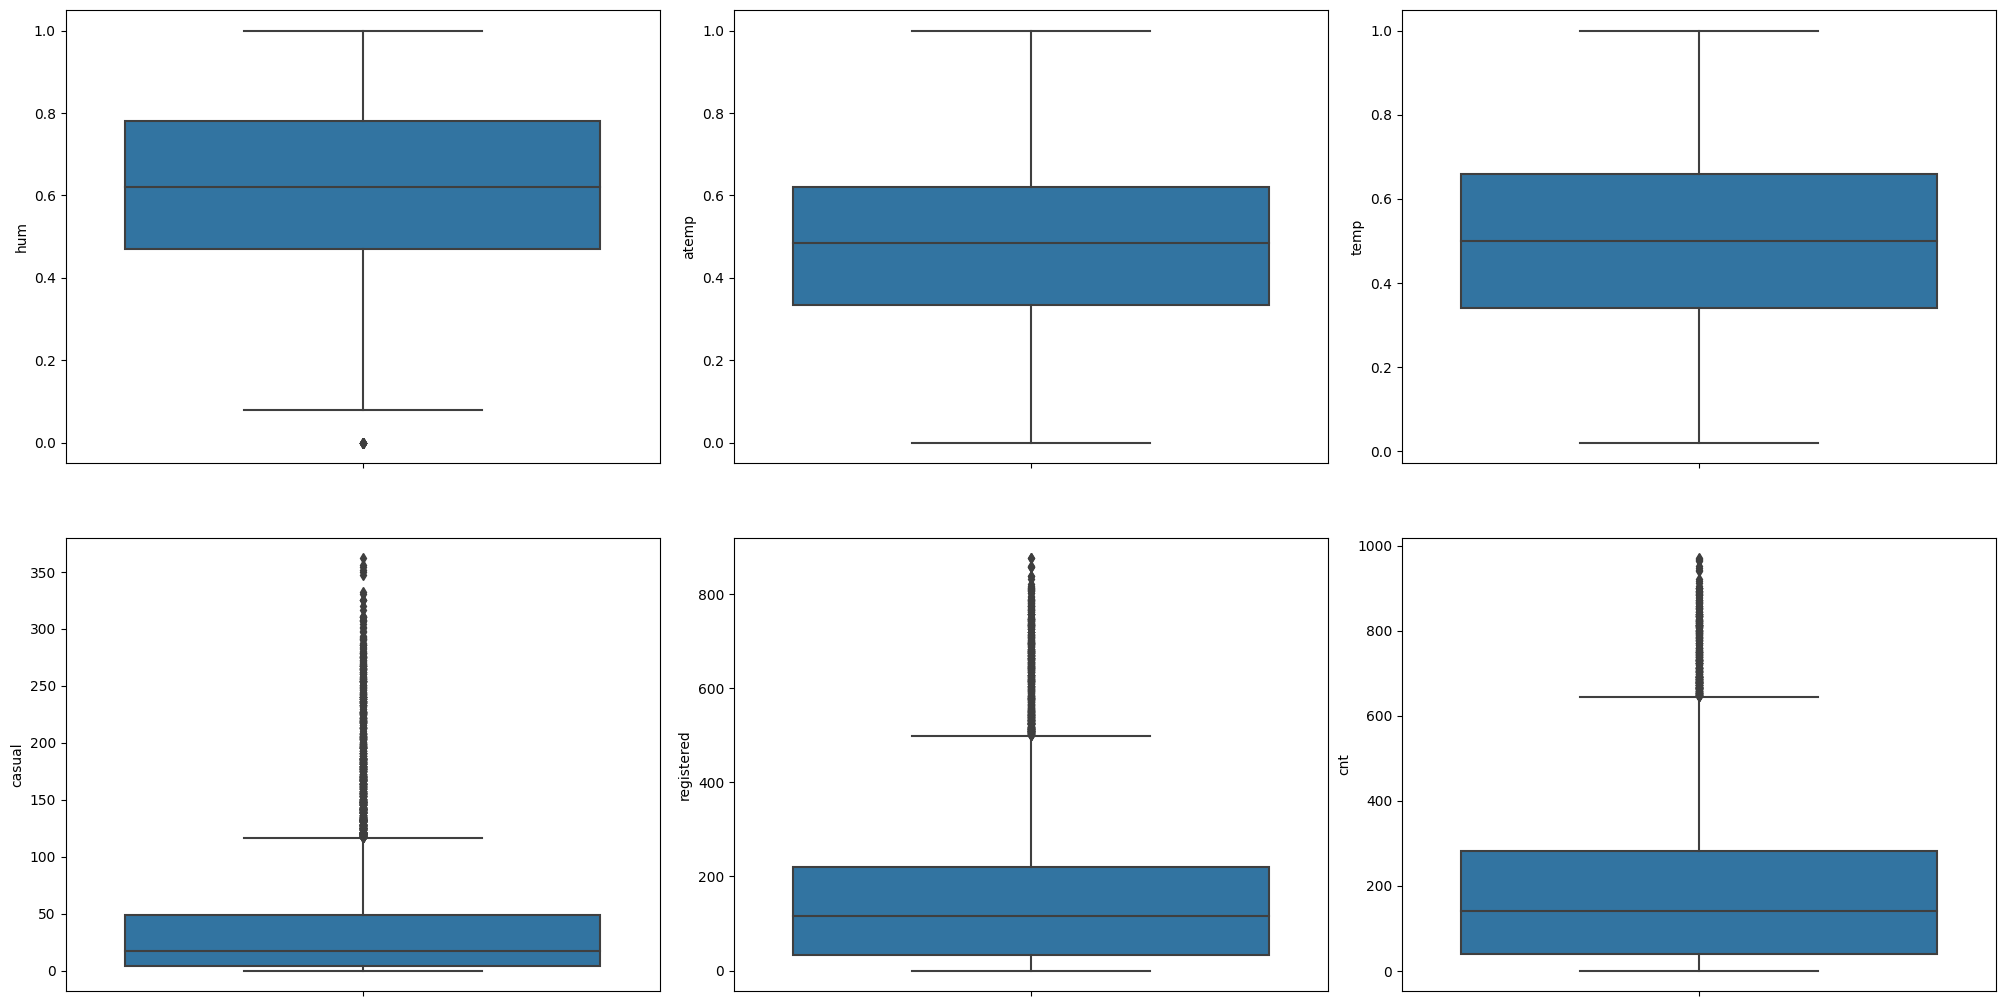

In [126]:
numericCols = dfBike.drop(['month','weathersit','holiday','season','hr'],axis=1).select_dtypes(include=[float, int]).columns

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in numericCols:
    sns.boxplot(y=col, data=dfBike, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

We can see that humidity has some interesting values as outliers. 0 humidity. It seems like an anomaly, because the weather will be extremely dry and should be in controlled environtment. So, we should take those data out.

0.47

0.78

0.31000000000000005

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   month       12165 non-null  int64         
 2   hum         12165 non-null  float64       
 3   weathersit  12165 non-null  int64         
 4   holiday     12165 non-null  int64         
 5   season      12165 non-null  int64         
 6   atemp       12165 non-null  float64       
 7   temp        12165 non-null  float64       
 8   hr          12165 non-null  int64         
 9   casual      12165 non-null  int64         
 10  registered  12165 non-null  int64         
 11  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1.1 MB


,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
345,2011-03-10,3,0.0,3,0,1,0.3939,0.38,7,1,36,37
871,2011-03-10,3,0.0,3,0,1,0.4394,0.44,15,3,11,14
1645,2011-03-10,3,0.0,3,0,1,0.3182,0.34,0,3,0,3
3239,2011-03-10,3,0.0,2,0,1,0.4394,0.44,17,2,109,111
3717,2011-03-10,3,0.0,2,0,1,0.3333,0.34,22,4,30,34
4924,2011-03-10,3,0.0,3,0,1,0.3333,0.36,6,0,12,12
7285,2011-03-10,3,0.0,3,0,1,0.3182,0.34,1,0,2,2
7760,2011-03-10,3,0.0,3,0,1,0.4242,0.42,12,4,30,34
8412,2011-03-10,3,0.0,3,0,1,0.3939,0.38,8,1,43,44
8960,2011-03-10,3,0.0,3,0,1,0.3485,0.34,23,1,26,27


Int64Index([  345,   871,  1645,  3239,  3717,  4924,  7285,  7760,  8412,
             8960,  9186,  9651, 10715, 11766],
           dtype='int64')

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   month       12151 non-null  int64         
 2   hum         12151 non-null  float64       
 3   weathersit  12151 non-null  int64         
 4   holiday     12151 non-null  int64         
 5   season      12151 non-null  int64         
 6   atemp       12151 non-null  float64       
 7   temp        12151 non-null  float64       
 8   hr          12151 non-null  int64         
 9   casual      12151 non-null  int64         
 10  registered  12151 non-null  int64         
 11  cnt         12151 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1.2 MB


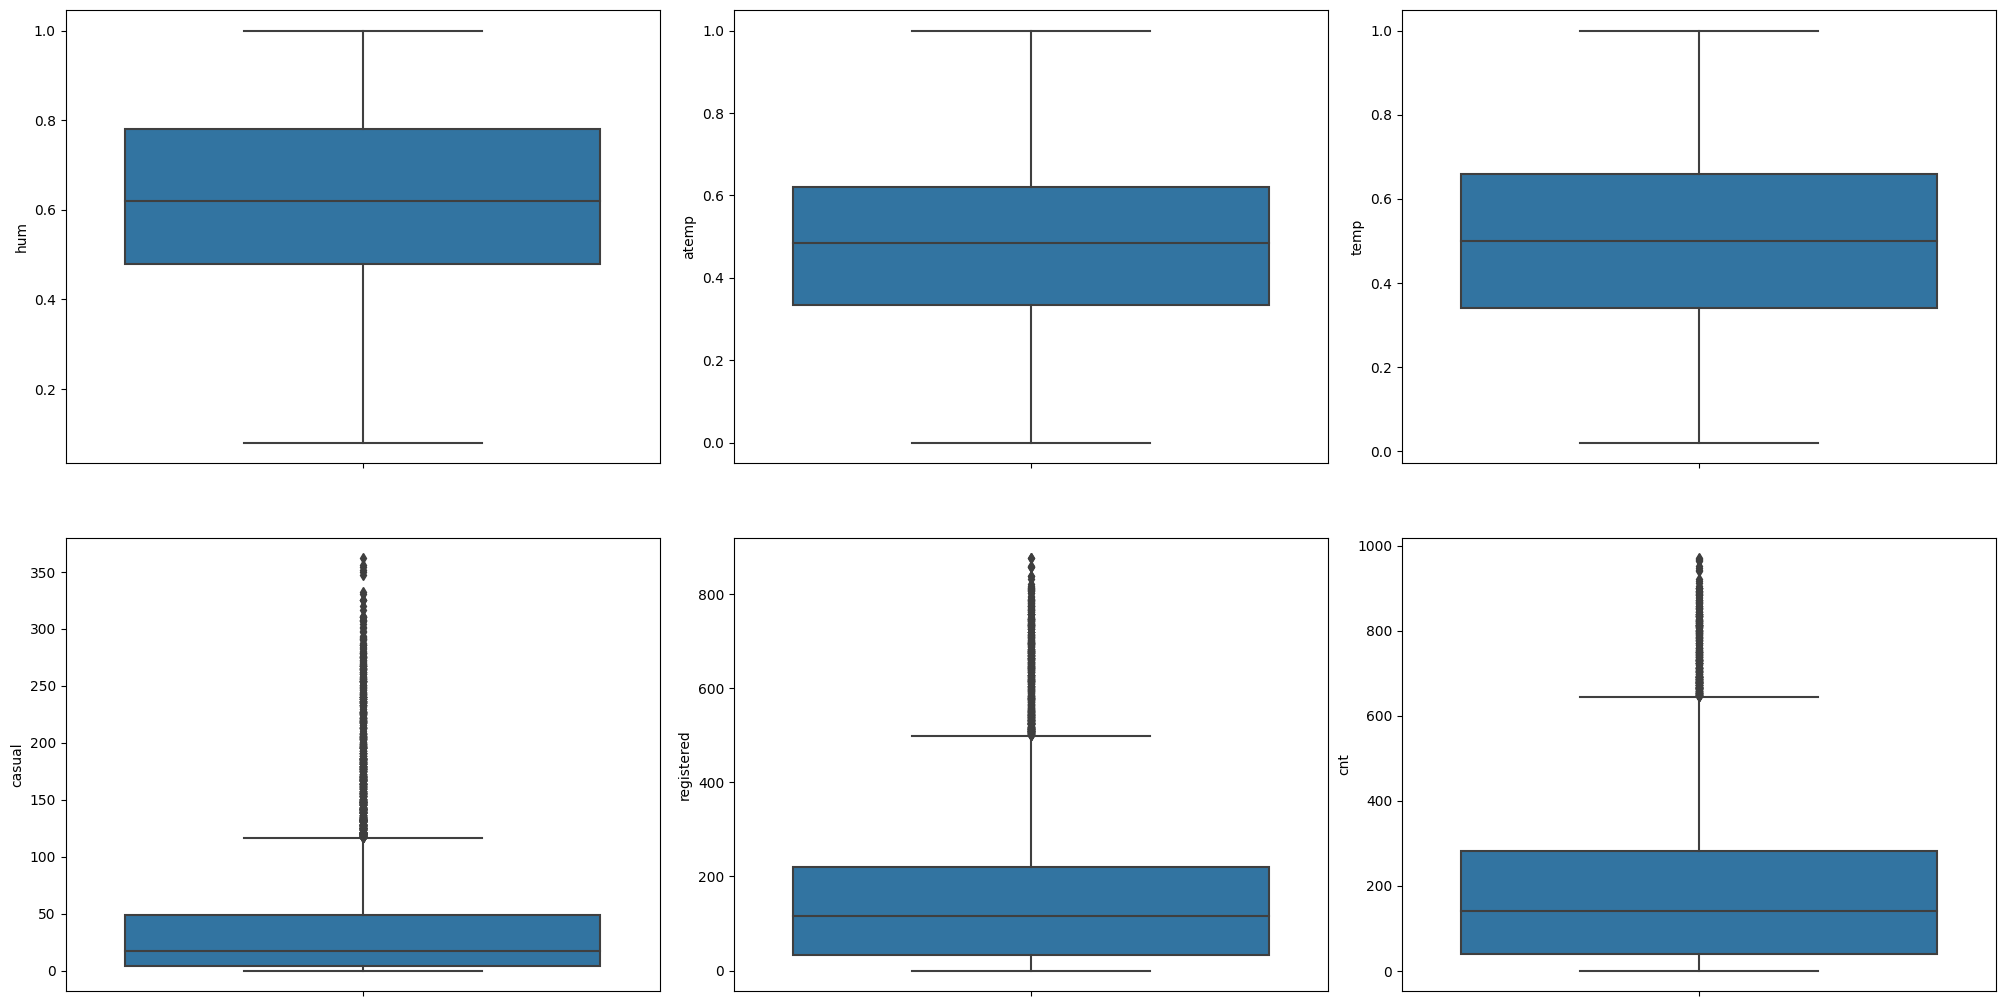

None

None

In [127]:
Q1count = dfBike['hum'].quantile(0.25)
Q3count = dfBike['hum'].quantile(0.75)
IQRcount = Q3count - Q1count
display(Q1count,Q3count,IQRcount)

outlierscount = dfBike[(dfBike['hum'] < Q1count - 1.5 * IQRcount) | (dfBike['hum'] > Q3count + 1.5 * IQRcount)]
display(outlierscount,
        outlierscount.index,
        dfBike.info())
dfBike = dfBike.drop(outlierscount.index)

numericCols = dfBike.drop(['month','weathersit','holiday','season','hr'],axis=1).select_dtypes(include=[float, int]).columns

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in numericCols:
    sns.boxplot(y=col, data=dfBike, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
display(dfBike.info(),
        plt.show())

As you can see here now, the outliers / anomaly has been taken out.

Casual and Registered seems to has same pattern with Cnt. We should take a further look into those columns.

In [128]:
display(dfBike[dfBike['cnt'] == 1],
        dfBike[dfBike['registered'] == 0],
        dfBike[dfBike['casual'] == 0])

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
39,2011-03-31,3,0.93,3,0,2,0.2273,0.24,3,0,1,1
292,2012-01-19,1,0.54,1,0,1,0.1515,0.12,4,0,1,1
309,2012-02-18,2,0.70,1,0,1,0.2576,0.24,5,0,1,1
501,2011-01-16,1,0.56,1,0,1,0.2576,0.26,4,0,1,1
508,2012-01-25,1,0.75,1,0,1,0.2576,0.26,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11437,2011-02-04,2,0.63,2,0,1,0.1667,0.14,3,0,1,1
11443,2011-01-30,1,0.93,1,0,1,0.2121,0.14,4,0,1,1
11491,2011-12-08,12,0.60,1,0,4,0.2273,0.26,3,0,1,1
11569,2011-03-30,3,0.57,2,0,2,0.3485,0.32,4,1,0,1


,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
1164,2011-02-21,2,0.45,1,1,1,0.3182,0.32,4,1,0,1
1819,2011-09-13,9,0.78,1,0,3,0.5758,0.60,2,2,0,2
1963,2011-01-10,1,0.50,1,0,1,0.1212,0.12,1,1,0,1
2297,2011-04-04,4,0.66,1,0,2,0.3939,0.38,3,1,0,1
3213,2011-09-18,9,0.77,1,0,3,0.4394,0.44,4,1,0,1
4190,2011-06-20,6,0.89,3,0,2,0.5758,0.64,3,1,0,1
4727,2011-01-01,1,0.80,1,0,1,0.2727,0.22,6,2,0,2
5943,2012-03-28,3,0.43,1,0,2,0.3333,0.36,4,1,0,1
7287,2011-03-08,3,0.52,1,0,1,0.2424,0.24,2,1,0,1
10784,2011-03-24,3,1.00,2,0,2,0.2727,0.28,3,1,0,1


,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
16,2012-02-27,2,0.80,1,0,1,0.2273,0.22,5,0,16,16
37,2011-05-09,5,0.77,1,0,2,0.4242,0.42,5,0,23,23
39,2011-03-31,3,0.93,3,0,2,0.2273,0.24,3,0,1,1
50,2012-02-04,2,0.70,1,0,1,0.2727,0.26,1,0,43,43
60,2011-04-07,4,0.54,1,0,2,0.4242,0.42,2,0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
12127,2012-03-13,3,0.72,3,0,1,0.5000,0.52,3,0,2,2
12130,2012-12-20,12,0.70,2,0,4,0.3182,0.30,5,0,35,35
12138,2012-03-06,3,0.44,1,0,1,0.1970,0.20,2,0,4,4
12157,2012-10-10,10,0.88,2,0,4,0.4545,0.46,3,0,6,6


As we can see above, Casual + Registered = Cnt. so, it means, Casual and Registered are the variable that directly shape the Cnt.  
Number of Casual user and Registered user are in the same meaning of Cnt, so we can choose one of those three columns as our target.  
The distribution of the values are populated in relatively small number of customers (under 300) based on range from 0 to 1000.

## **Data Analysis (Correlation and Impact)**

Let's add more variable that can add more depth to our independent variables to enhance our learning.  
We could divide the Date time into more columns.

0         9
1        17
2        15
3        31
4        31
         ..
12160    25
12161     6
12162    20
12163    31
12164    28
Name: dteday, Length: 12151, dtype: int64

([<matplotlib.axis.XTick at 0x16f420510>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31')])

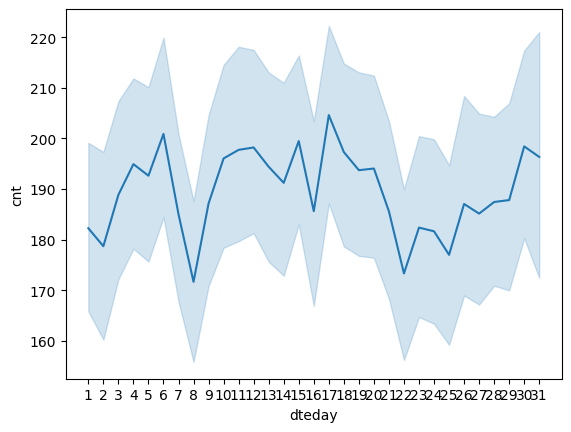

In [129]:
dayDate = dfBike['dteday'].dt.day

display(dayDate)
sns.lineplot(data=dfBike,
             x=dayDate,
             y='cnt')
plt.xticks(ticks=np.sort(dayDate.unique()))

The graph above is about count of total customers per date. As we can see above, there are patterns that tells about how date can impact the count of total customers.  
It means date can be a potential variable to define the count of total customers.

Now, let's add the new column into the dataset (dataframe).

In [130]:
dfBike['dayDate'] = dayDate
dfBike

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,dayDate
0,2011-12-09,12,0.62,1,0,4,0.3485,0.36,16,24,226,250,9
1,2012-06-17,6,0.64,1,0,2,0.5152,0.54,4,2,16,18,17
2,2011-06-15,6,0.53,1,0,2,0.6212,0.62,23,17,90,107,15
3,2012-03-31,3,0.87,2,0,2,0.3485,0.36,8,19,126,145,31
4,2012-07-31,7,0.55,1,0,3,0.6970,0.76,18,99,758,857,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,1,0.75,1,0,1,0.2273,0.24,7,14,243,257,25
12161,2012-07-06,7,0.62,1,0,3,0.7424,0.78,0,39,63,102,6
12162,2012-02-20,2,0.60,2,1,1,0.2121,0.24,5,0,6,6,20
12163,2012-03-31,3,0.77,2,0,2,0.4242,0.42,2,14,55,69,31


0           Friday
1           Sunday
2        Wednesday
3         Saturday
4          Tuesday
           ...    
12160    Wednesday
12161       Friday
12162       Monday
12163     Saturday
12164     Thursday
Name: dteday, Length: 12151, dtype: object

([<matplotlib.axis.XTick at 0x16f484c50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

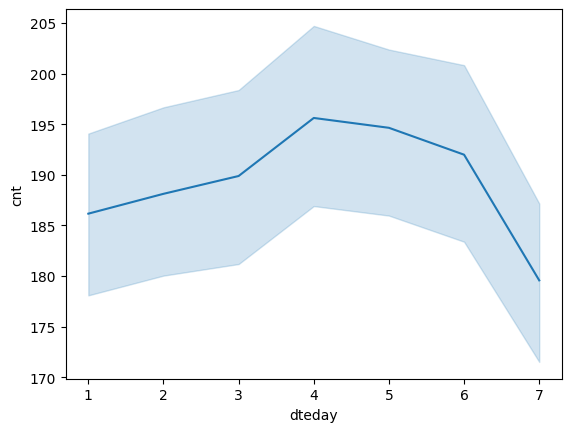

In [131]:
dayName = dfBike['dteday'].dt.strftime('%A')
display(dayName)
dayMapper = {'Monday' : 1,
             'Tuesday' : 2,
             'Wednesday' : 3,
             'Thursday' : 4,
             'Friday' : 5,
             'Saturday' : 6,
             'Sunday' : 7}

dayName = dayName.map(dayMapper)
sns.lineplot(data=dfBike,
             x=dayName,
             y='cnt')
plt.xticks(ticks=np.sort(dayName.unique()))

The graph above is about total customers per day name. As we can see above, there are some pattern that could help the model to define the total customers.  
We can potentially use this variable to define the count of total customers.

Let's add it into our dataset (dataframe).

In [132]:
dfBike['dayName'] = dayName
dfBike

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,dayDate,dayName
0,2011-12-09,12,0.62,1,0,4,0.3485,0.36,16,24,226,250,9,5
1,2012-06-17,6,0.64,1,0,2,0.5152,0.54,4,2,16,18,17,7
2,2011-06-15,6,0.53,1,0,2,0.6212,0.62,23,17,90,107,15,3
3,2012-03-31,3,0.87,2,0,2,0.3485,0.36,8,19,126,145,31,6
4,2012-07-31,7,0.55,1,0,3,0.6970,0.76,18,99,758,857,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,1,0.75,1,0,1,0.2273,0.24,7,14,243,257,25,3
12161,2012-07-06,7,0.62,1,0,3,0.7424,0.78,0,39,63,102,6,5
12162,2012-02-20,2,0.60,2,1,1,0.2121,0.24,5,0,6,6,20,1
12163,2012-03-31,3,0.77,2,0,2,0.4242,0.42,2,14,55,69,31,6


In [133]:
yearDate = dfBike['dteday'].dt.year
dfBike['year'] = yearDate
dfBike

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,dayDate,dayName,year
0,2011-12-09,12,0.62,1,0,4,0.3485,0.36,16,24,226,250,9,5,2011
1,2012-06-17,6,0.64,1,0,2,0.5152,0.54,4,2,16,18,17,7,2012
2,2011-06-15,6,0.53,1,0,2,0.6212,0.62,23,17,90,107,15,3,2011
3,2012-03-31,3,0.87,2,0,2,0.3485,0.36,8,19,126,145,31,6,2012
4,2012-07-31,7,0.55,1,0,3,0.6970,0.76,18,99,758,857,31,2,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,1,0.75,1,0,1,0.2273,0.24,7,14,243,257,25,3,2012
12161,2012-07-06,7,0.62,1,0,3,0.7424,0.78,0,39,63,102,6,5,2012
12162,2012-02-20,2,0.60,2,1,1,0.2121,0.24,5,0,6,6,20,1,2012
12163,2012-03-31,3,0.77,2,0,2,0.4242,0.42,2,14,55,69,31,6,2012


The year is only 2011 and 2012, we can make it categorical later in modeling process.

In [134]:
display(dfBike[dfBike['dteday'] == '2012-07-08'],
        dfBike['dteday'].value_counts())

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,dayDate,dayName,year
481,2012-07-08,7,0.38,1,0,3,0.8788,0.94,13,118,219,337,8,7,2012
820,2012-07-08,7,0.66,2,0,3,0.8030,0.80,16,65,226,291,8,7,2012
1708,2012-07-08,7,0.42,3,0,3,0.8939,0.92,15,80,218,298,8,7,2012
2850,2012-07-08,7,0.70,1,0,3,0.7727,0.78,6,5,16,21,8,7,2012
3421,2012-07-08,7,0.59,1,0,3,0.7424,0.78,17,68,202,270,8,7,2012
3704,2012-07-08,7,0.66,1,0,3,0.8030,0.80,7,19,33,52,8,7,2012
4207,2012-07-08,7,0.53,1,0,3,0.8030,0.84,8,35,95,130,8,7,2012
5702,2012-07-08,7,0.56,1,0,3,0.7879,0.82,0,22,125,147,8,7,2012
6073,2012-07-08,7,0.62,1,0,3,0.7424,0.78,5,1,5,6,8,7,2012
6188,2012-07-08,7,0.83,3,0,3,0.6364,0.68,23,25,98,123,8,7,2012


2012-07-08    22
2011-08-09    22
2011-02-01    22
2012-09-29    22
2012-07-04    22
              ..
2011-10-26     9
2012-10-30     8
2011-01-27     7
2011-01-18     6
2012-10-29     1
Name: dteday, Length: 730, dtype: int64

As we can see above, one exact date could have multiple rows / values with different environmental variable. We can assume that the data was gathered in the same day but in different location. Capital Bikeshare has multiple stations scattered throughout the city.

In [135]:
dfBike['weekdays'] = np.where(dfBike['dayName'] > 5, 0, 1)
dfBike

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,dayDate,dayName,year,weekdays
0,2011-12-09,12,0.62,1,0,4,0.3485,0.36,16,24,226,250,9,5,2011,1
1,2012-06-17,6,0.64,1,0,2,0.5152,0.54,4,2,16,18,17,7,2012,0
2,2011-06-15,6,0.53,1,0,2,0.6212,0.62,23,17,90,107,15,3,2011,1
3,2012-03-31,3,0.87,2,0,2,0.3485,0.36,8,19,126,145,31,6,2012,0
4,2012-07-31,7,0.55,1,0,3,0.6970,0.76,18,99,758,857,31,2,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,1,0.75,1,0,1,0.2273,0.24,7,14,243,257,25,3,2012,1
12161,2012-07-06,7,0.62,1,0,3,0.7424,0.78,0,39,63,102,6,5,2012,1
12162,2012-02-20,2,0.60,2,1,1,0.2121,0.24,5,0,6,6,20,1,2012,1
12163,2012-03-31,3,0.77,2,0,2,0.4242,0.42,2,14,55,69,31,6,2012,0


We can also add weekdays as a generalized version of day name. This might help the model to learn more pattern.

([<matplotlib.axis.XTick at 0x16f5b59d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

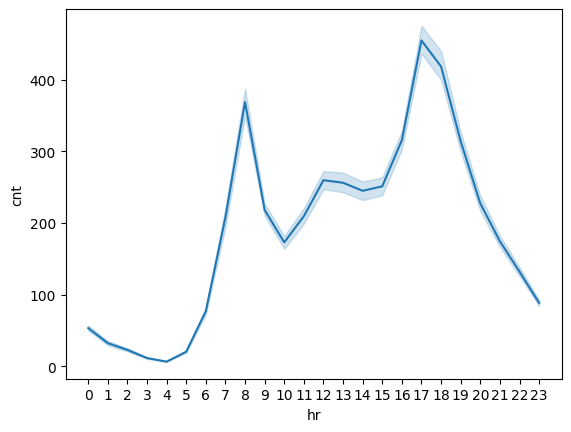

In [136]:
sns.lineplot(data=dfBike,
             x='hr',
             y='cnt')
plt.xticks(ticks=np.sort(dfBike['hr'].unique()))

The graph above is about count of total customers per hour.  
The pattern looks clear and tight.  
It means this variable could contribute strongly in shaping the count of total customers.

([<matplotlib.axis.XTick at 0x16f5c13d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

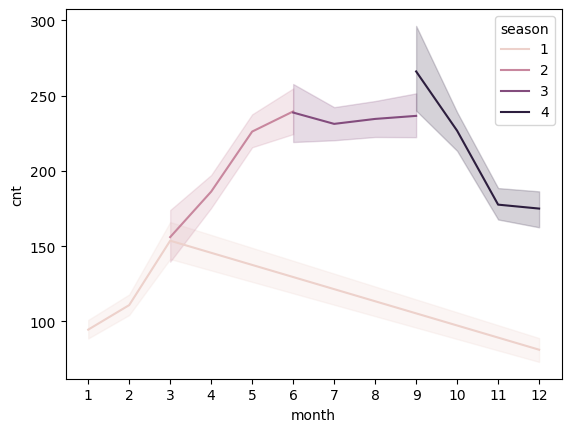

In [137]:
sns.lineplot(data=dfBike,
             x='month',
             y='cnt',
             hue='season')
plt.xticks(ticks=np.sort(dfBike['month'].unique()))

The graph above is about total customers number per month.  
The patterns also looks clear.  
It means that month could strongly affect the count of total customers.

In [138]:
dfBike[dfBike['month'] == 12].sort_values('season')['season'].value_counts()

4    645
1    376
Name: season, dtype: int64

But, as we see in the graph above, the season '1' has a overlapping line to month '12'.  
If we check based on value count above, we can conclude that month '12' is a transitioning month for season '4' and season '1'

<Axes: xlabel='year', ylabel='cnt'>

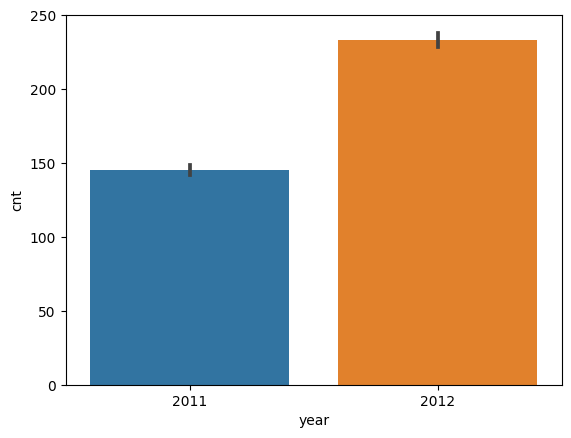

In [139]:
sns.barplot(data=dfBike,
             x='year',
             y='cnt')

The graph above is about total customers per year.  
Both year has clear difference, it means year can be a potential variables to define total customers in model later.

<Axes: xlabel='weathersit', ylabel='cnt'>

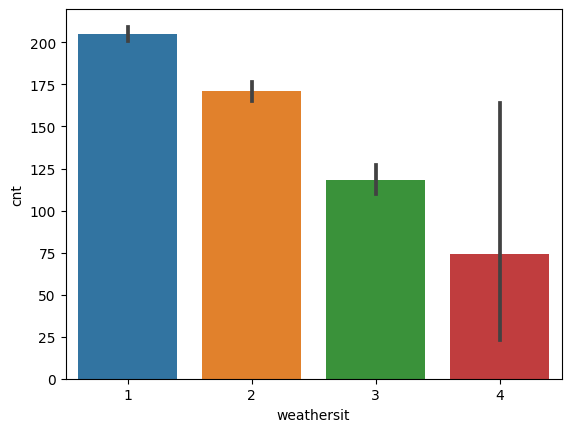

In [140]:
sns.barplot(data=dfBike,
             x='weathersit',
             y='cnt')

The graph above is about total customers per weather.  
They have clear difference when compared to total customers.  
It means the weather can also potentially be used as variable to define the total customers.

In [141]:
dfBike['weathersit'].value_counts()

1    8071
2    3117
3     960
4       3
Name: weathersit, dtype: int64

In [142]:
dfBike.loc[dfBike['weathersit'] == 4,'weathersit'] = 3
dfBike['weathersit'].value_counts()

1    8071
2    3117
3     963
Name: weathersit, dtype: int64

There is small value in weathersit '4' (only 3 rows) that makes the mean in the graph above spread widely.  
We can merge it into weathersit '3' as the meaning of weathersit '3' (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) and '4' (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) can be categorized as rainy day.

<Axes: xlabel='holiday', ylabel='cnt'>

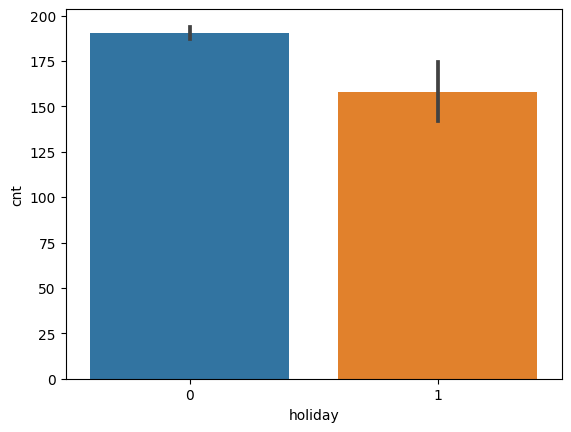

In [143]:
sns.barplot(data=dfBike,
             x='holiday',
             y='cnt')

The graph above is about total customers per holiday status.  
There's only small difference between those 2 holiday stats.  
This column can still be used to help the model learn, but it will has small impact.

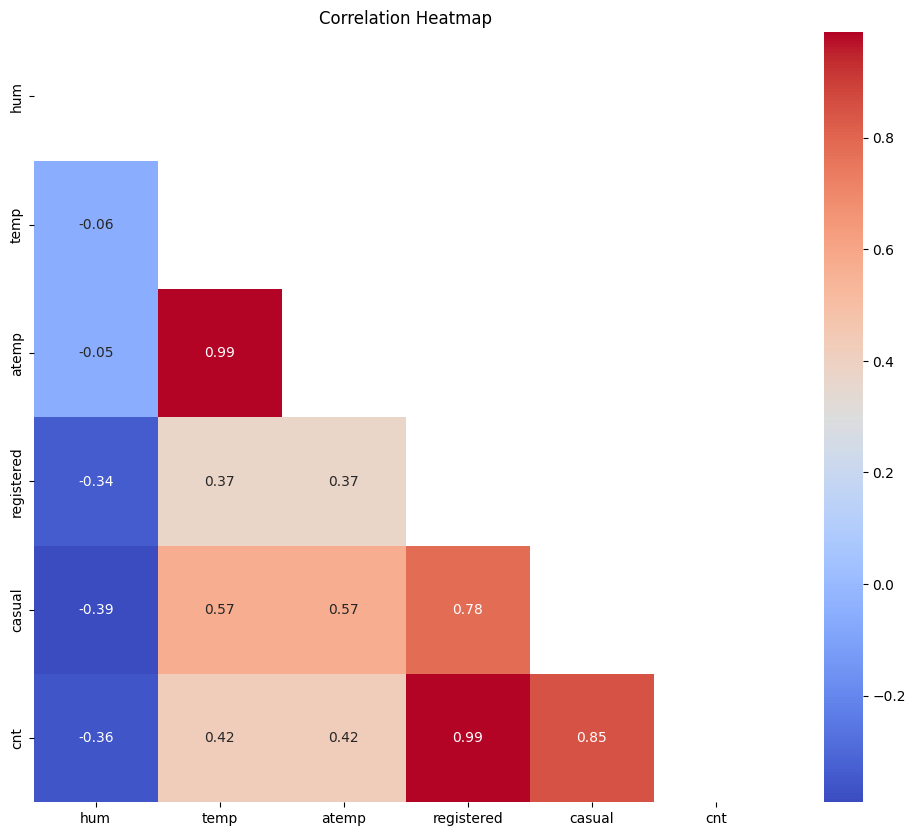

In [144]:
dfBikeCorr = dfBike[['hum','temp','atemp','registered','casual','cnt']].corr('spearman') # pearson numeric2 continuous dan coba chi square untuk cat to num
mask = np.triu(np.ones_like(dfBikeCorr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(dfBikeCorr, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)
plt.title("Correlation Heatmap")
plt.show()

The graph above is about correlation among numerical variables and count of total customers.  
As you can see above, temp and atemp is multicolinear (same meaning, same purpose), so we can choose one of them.  
Registered and Casual also directly shape the count of total customers.

In [145]:
dfBike['holiday'] = dfBike['holiday'].astype('category')
dfBike['weathersit'] = dfBike['weathersit'].astype('category')
dfBike['month'] = dfBike['month'].astype('category')
dfBike['hr'] = dfBike['hr'].astype('category')
dfBike['dayDate'] = dfBike['dayDate'].astype('category')
dfBike['dayName'] = dfBike['dayName'].astype('category')
dfBike['season'] = dfBike['season'].astype('category')
dfBike['weekdays'] = dfBike['weekdays'].astype('category')
dfBike['year'] = dfBike['year'].astype('category')
dfBike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12151 non-null  datetime64[ns]
 1   month       12151 non-null  category      
 2   hum         12151 non-null  float64       
 3   weathersit  12151 non-null  category      
 4   holiday     12151 non-null  category      
 5   season      12151 non-null  category      
 6   atemp       12151 non-null  float64       
 7   temp        12151 non-null  float64       
 8   hr          12151 non-null  category      
 9   casual      12151 non-null  int64         
 10  registered  12151 non-null  int64         
 11  cnt         12151 non-null  int64         
 12  dayDate     12151 non-null  category      
 13  dayName     12151 non-null  category      
 14  year        12151 non-null  category      
 15  weekdays    12151 non-null  category      
dtypes: category(9), dateti

In [223]:
dfBike

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,dayDate,dayName,year,weekdays
0,2011-12-09,12,0.62,1,0,4,0.3485,0.36,16,24,226,250,9,5,2011,1
1,2012-06-17,6,0.64,1,0,2,0.5152,0.54,4,2,16,18,17,7,2012,0
2,2011-06-15,6,0.53,1,0,2,0.6212,0.62,23,17,90,107,15,3,2011,1
3,2012-03-31,3,0.87,2,0,2,0.3485,0.36,8,19,126,145,31,6,2012,0
4,2012-07-31,7,0.55,1,0,3,0.6970,0.76,18,99,758,857,31,2,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,1,0.75,1,0,1,0.2273,0.24,7,14,243,257,25,3,2012,1
12161,2012-07-06,7,0.62,1,0,3,0.7424,0.78,0,39,63,102,6,5,2012,1
12162,2012-02-20,2,0.60,2,1,1,0.2121,0.24,5,0,6,6,20,1,2012,1
12163,2012-03-31,3,0.77,2,0,2,0.4242,0.42,2,14,55,69,31,6,2012,0


Last, to make it clear, we declare each column type. Which ones are categorical and numeric.

# **Modeling**

After we have an understanding of the data, we can start to do modeling (model selection and tuning).

## **Potential Model Listing**

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

First, we import potential models to be trained from regression family model.  
We will use 9 different initial models to be trained.

**Models brief explanation:**
1. Linear Regression: Linear regression is a basic and widely used regression algorithm that models the relationship between the dependent variable and one or more independent variables as a linear equation. It is suitable for cases where there is a linear relationship between the variables.

2. K-Nearest Neighbors (KNN) Regressor: KNN regressor predicts the value of a data point by averaging the values of its k nearest neighbors. It is useful when the data has local patterns and the predicted value is expected to be similar to its nearby points.

3. Decision Tree Regressor: Decision tree regressor creates a tree-like model that predicts the target variable based on a series of binary decisions. It is suitable for both linear and nonlinear relationships and can handle both numerical and categorical features.

4. Support Vector Regression (SVR): SVR uses support vector machines to perform regression tasks. It finds a hyperplane that maximizes the margin while minimizing the error between the predicted and actual values. SVR is effective for cases where there is a complex relationship between the variables and handling nonlinear data.

5. Random Forest Regressor: Random forest regressor is an ensemble learning method that combines multiple decision trees to make predictions. It is robust against overfitting and performs well with complex datasets, handling both numerical and categorical features.

6. XGBoost Regressor: XGBoost regressor is an implementation of gradient boosting, which builds an ensemble of weak prediction models to create a strong predictive model. It excels in handling complex and large-scale datasets, providing high predictive accuracy.

7. Ridge Regression: Ridge regression is a regularized linear regression model that adds a penalty term to the loss function, which helps reduce the impact of multicollinearity in the data. It is useful when dealing with high-dimensional data and can handle multicollinear features.

8. Lasso Regression: Lasso regression is another regularized linear regression model that performs variable selection by adding an L1 penalty term to the loss function. It is suitable when there are many features and some of them are expected to have little impact on the target variable.

9. Gradient Boosting Regressor: Gradient boosting regressor is an ensemble method that combines multiple weak models in a sequential manner to improve predictive performance. It is effective for a wide range of regression problems, providing high accuracy and handling complex relationships between variables.

In [147]:
linreg = LinearRegression()
knnreg = KNeighborsRegressor()
treereg = DecisionTreeRegressor()
svreg = SVR()
rfreg = RandomForestRegressor()
xgbreg = XGBRegressor()
ridgereg = Ridge()
lassoreg = Lasso()
gradientreg = GradientBoostingRegressor()
normalModel = [linreg,knnreg,treereg,svreg,rfreg,xgbreg,ridgereg,lassoreg,gradientreg]
normalModelName = ['linreg','knnreg','treereg','svreg','rfreg','xgbreg','ridgereg','lassoreg','gradientreg']

In [148]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [149]:
encoderOHE = OneHotEncoder()
transformer = ColumnTransformer([('encodingOHE',encoderOHE,['weathersit','season','dayName'])],
                                remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('encodingOHE', OneHotEncoder(),
                                 ['weathersit', 'season', 'dayName'])])

We also import the tools to preprocess data and create a transformer to differentiate the process/tools used for each columns.  
We only use One Hot Encoder in this preprocessing because mostly the data are quite clean.

The Humidity and Temp are numerical but has been scaled in range of 0 to 1.  
The month, dayDate, hr were already ordinal encoded.

We're left with weather, season, and dayName with relatively small number of class that can be applied with One Hot Encoder.

1. OneHotEncoder():
OneHotEncoder converts categorical variables into a binary representation, creating binary columns for each category. It is useful when working with categorical features that lack inherent order or hierarchy.
2. ColumnTransformer():
ColumnTransformer allows for applying different transformations to different columns or subsets of columns in a dataset. It is handy when you have a mix of numerical and categorical features, enabling specific transformations for each feature type in a single step.

## **Train / Test Data Split**

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
xBike = dfBike.drop(['cnt','registered','casual','dteday','atemp'],axis = 1)
yBike = dfBike['cnt']

xTrainBike, xTestBike, yTrainBike, yTestBike = train_test_split(xBike,
                                                                yBike,
                                                                random_state = 99,
                                                                test_size = 0.2)
display(dfBike,
        xTrainBike,
        xTestBike,
        yTrainBike,
        yTestBike)

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,dayDate,dayName,year,weekdays
0,2011-12-09,12,0.62,1,0,4,0.3485,0.36,16,24,226,250,9,5,2011,1
1,2012-06-17,6,0.64,1,0,2,0.5152,0.54,4,2,16,18,17,7,2012,0
2,2011-06-15,6,0.53,1,0,2,0.6212,0.62,23,17,90,107,15,3,2011,1
3,2012-03-31,3,0.87,2,0,2,0.3485,0.36,8,19,126,145,31,6,2012,0
4,2012-07-31,7,0.55,1,0,3,0.6970,0.76,18,99,758,857,31,2,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,1,0.75,1,0,1,0.2273,0.24,7,14,243,257,25,3,2012,1
12161,2012-07-06,7,0.62,1,0,3,0.7424,0.78,0,39,63,102,6,5,2012,1
12162,2012-02-20,2,0.60,2,1,1,0.2121,0.24,5,0,6,6,20,1,2012,1
12163,2012-03-31,3,0.77,2,0,2,0.4242,0.42,2,14,55,69,31,6,2012,0


,month,hum,weathersit,holiday,season,temp,hr,dayDate,dayName,year,weekdays
7756,8,0.74,1,0,3,0.70,2,1,1,2011,1
3523,3,0.50,1,0,1,0.40,23,11,7,2012,0
1251,7,0.49,1,0,3,0.82,15,24,2,2012,1
11777,7,0.51,1,0,3,0.74,20,11,3,2012,1
10850,8,0.30,1,0,3,0.86,15,17,5,2012,1
...,...,...,...,...,...,...,...,...,...,...,...
7898,1,0.59,2,0,1,0.20,5,5,4,2012,1
1771,6,0.77,1,0,2,0.52,23,6,3,2012,1
9941,1,0.47,1,0,1,0.16,16,24,1,2011,1
3244,8,0.69,2,0,3,0.64,8,19,7,2012,0


,month,hum,weathersit,holiday,season,temp,hr,dayDate,dayName,year,weekdays
6318,9,0.69,1,0,3,0.64,9,13,2,2011,1
7924,1,0.93,2,0,1,0.20,10,23,1,2012,1
7586,9,0.83,2,0,3,0.60,5,2,5,2011,1
4772,12,0.63,1,0,4,0.52,22,15,4,2011,1
6095,11,0.41,1,0,4,0.28,19,18,5,2011,1
...,...,...,...,...,...,...,...,...,...,...,...
11406,8,0.73,1,0,3,0.64,8,22,3,2012,1
3902,10,0.88,3,0,4,0.56,6,14,5,2011,1
11204,9,0.68,2,0,3,0.52,11,17,6,2011,0
2792,4,0.54,1,0,2,0.70,14,24,7,2011,0


7756      11
3523      52
1251     285
11777    483
10850    383
        ... 
7898      26
1771     123
9941      70
3244     124
7209     185
Name: cnt, Length: 9720, dtype: int64

6318     214
7924     149
7586      20
4772     124
6095     190
        ... 
11406    740
3902      94
11204    367
2792     420
1081     104
Name: cnt, Length: 2431, dtype: int64

First, we do train test split from the master dataset.  
So, we can have two different dataset that can be used for different purpose: Training and Testing (Validating).  
The proportion is 80% for train data, 20% for test data.

Train-test split is performed before modeling to assess how well the model generalizes to unseen data. By dividing the dataset into training and testing subsets, the model is trained on the training set and evaluated on the testing set. This helps in estimating the model's performance on new, unseen data and detecting overfitting. It also allows for tuning the model's hyperparameters and comparing different models' performance objectively, aiding in model selection and avoiding biased evaluations.

In [152]:
# Data Desc
listItem = []
for col in xBike.columns :
    listItem.append([col,
                     xBike[col].dtype,
                     xBike[col].isna().sum(),
                     round(((xBike[col].isna().sum()) / (len(xBike))) * 100 , 2),
                     xBike[col].nunique(),
                     list(xBike[col].drop_duplicates().sample(5,replace=True).values)])
    
descData = pd.DataFrame(data = listItem,
                        columns = ['column',
                                   'Data Type',
                                   'Missing Values',
                                   'Pct Missing Values',
                                   'Num Unique',
                                   'Unique Sample'])

display(descData.merge(xBike.describe().transpose().reset_index().rename({'index' : 'column'},axis=1),
                       'left',
                       'column'))

,column,Data Type,Missing Values,Pct Missing Values,Num Unique,Unique Sample,count,mean,std,min,25%,50%,75%,max
0,month,category,0,0.0,12,"[4, 4, 11, 9, 4]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hum,float64,0,0.0,88,"[0.23, 0.24, 0.5, 0.36, 0.37]",12151.0,0.626172,0.191036,0.08,0.48,0.62,0.78,1.0
2,weathersit,category,0,0.0,3,"[1, 3, 2, 1, 2]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,holiday,category,0,0.0,2,"[0, 0, 0, 1, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,season,category,0,0.0,4,"[1, 2, 1, 2, 4]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,temp,float64,0,0.0,50,"[1.0, 0.44, 1.0, 0.56, 0.16]",12151.0,0.498313,0.192562,0.02,0.34,0.50,0.66,1.0
6,hr,category,0,0.0,24,"[0, 23, 17, 22, 20]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,dayDate,category,0,0.0,31,"[31, 20, 27, 27, 29]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,dayName,category,0,0.0,7,"[4, 6, 7, 7, 6]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,year,category,0,0.0,2,"[2012, 2011, 2011, 2011, 2011]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We take a glimpse look into our train data characteristic.  
It helps us remember the data and values if some process go wrong later.

## **Model Benchmarking**

In [153]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV

Now, we should do cross validation in order to find the best model in its base form.  
This process is important to save time because we already get which model is the best to perform before we do hyper parameter tuning.  
Because, mostly the base form of the models are quite representative in overall.

Cross-validation is performed when we have multiple base models to obtain a robust estimate of their performance. It involves dividing the data into multiple subsets or folds, where each fold serves as a validation set while the remaining folds are used for training. This allows us to evaluate each model's performance on different subsets of data, reducing the risk of biased evaluation based on a single train-test split. Cross-validation provides a more reliable estimate of the models' generalization ability and helps in comparing and selecting the best-performing model.

In [32]:
# kandidat model

listMAEall = []
listMAEmean = []
listMAEstd = []

listMAPEall = []
listMAPEmean = []
listMAPEstd = []

listMSEall = []
listMSEmean = []
listMSEstd = []

listRMSEall = []
listRMSEmean = []
listRMSEstd = []

for model in normalModel :
    pipeModel = Pipeline([('prepro',transformer),
                          ('modeling', model)])
    cvScore = cross_validate(estimator=pipeModel,
                             X = xTrainBike,
                             y = yTrainBike,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'])
    listMAEall.append(cvScore['test_neg_mean_absolute_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEall.append(cvScore['test_neg_mean_absolute_percentage_error'])
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEall.append(cvScore['test_neg_mean_squared_error'])
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEall.append(cvScore['test_neg_root_mean_squared_error'])
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())

dfCV = pd.DataFrame()
dfCV['algo'] = normalModelName
dfCV['MAEmean'] = listMAEmean
dfCV['MAEstd'] = listMAEstd
dfCV['MAEall'] = listMAEall
dfCV['MAPEmean'] = listMAPEmean
dfCV['MAPEstd'] = listMAPEstd
dfCV['MAPEall'] = listMAPEall
dfCV['MSEmean'] = listMSEmean
dfCV['MSEstd'] = listMSEstd
dfCV['MSEall'] = listMSEall
dfCV['RMSEmean'] = listRMSEmean
dfCV['RMSEstd'] = listRMSEstd
dfCV['RMSEall'] = listRMSEall
dfCV

,algo,MAEmean,MAEstd,MAEall,MAPEmean,MAPEstd,MAPEall,MSEmean,MSEstd,MSEall,RMSEmean,RMSEstd,RMSEall
0,linreg,-75.648570,1.454355,"[-75.19458989458825, -73.61809006115465, -74.8...",-2.777340,0.207212,"[-3.146680952182823, -2.7600508017952774, -2.8...",-10418.258973,456.509897,"[-10264.463004578629, -9946.785595856798, -101...",-102.045894,2.212360,"[-101.31368616617712, -99.73357306271944, -100..."
1,knnreg,-114.690700,3.354213,"[-111.00390946502057, -116.52263374485597, -11...",-4.686470,0.302469,"[-5.044914015724588, -4.834934835838195, -4.89...",-24529.908733,1466.894154,"[-22891.060658436214, -25187.167654320987, -23...",-156.550784,4.664835,"[-151.29792020525667, -158.70465542737236, -15..."
2,treereg,-46.168313,2.502855,"[-41.58641975308642, -48.635288065843625, -48....",-0.621582,0.072877,"[-0.5730138640595903, -0.6911464563502318, -0....",-6027.515638,497.768222,"[-5213.043209876543, -6609.905864197531, -6440...",-77.569330,3.242627,"[-72.20140725689869, -81.30132756725152, -80.2..."
3,svreg,-138.431556,4.611195,"[-131.392962323899, -138.00808822477825, -136....",-5.655912,0.384669,"[-6.038984681367689, -5.677779121119069, -6.11...",-35390.240199,3031.484551,"[-30880.632877840028, -35147.97345832952, -337...",-187.949253,8.081983,"[-175.72886182366295, -187.4779279230745, -183..."
4,rfreg,-35.021499,0.758467,"[-34.169135802469135, -34.804048353909465, -35...",-0.616103,0.046845,"[-0.6436682260225347, -0.6167219887166338, -0....",-3092.251353,138.221522,"[-3032.6258235596706, -3015.4884406893, -3147....",-55.594329,1.233660,"[-55.06928203236057, -54.91346320065144, -56.0..."
5,xgbreg,-32.875777,1.209767,"[-30.99360687484574, -32.029727954130024, -34....",-0.707431,0.027143,"[-0.6905849537987022, -0.6748864859763366, -0....",-2494.565864,216.334294,"[-2310.728838438717, -2245.2074628066657, -270...",-49.899071,2.156058,"[-48.07004096564426, -47.38362019523905, -52.0..."
6,ridgereg,-75.635152,1.454533,"[-75.16537099819705, -73.61517233259134, -74.8...",-2.770406,0.205907,"[-3.1370508798535384, -2.7535576007778153, -2....",-10418.029058,457.763014,"[-10258.227913083174, -9948.516218247338, -101...",-102.044639,2.218252,"[-101.2829102715911, -99.74224891312275, -100...."
7,lassoreg,-76.800685,1.453211,"[-75.01147868879298, -75.54511237007482, -76.6...",-2.495187,0.187326,"[-2.7864176003923804, -2.4792485551175156, -2....",-11069.134306,524.058631,"[-10484.802006001246, -10800.387402323366, -10...",-105.180965,2.469613,"[-102.39532218808263, -103.92491232771556, -10..."
8,gradientreg,-60.800885,1.159770,"[-58.91897449751935, -60.65716622364631, -60.8...",-1.478377,0.102043,"[-1.5530015205658325, -1.4692035271854813, -1....",-7247.939698,226.896272,"[-6897.367782436909, -7226.675458979705, -7155...",-85.124379,1.334097,"[-83.0503930299966, -85.00985506974885, -84.59..."


Based on result above, we can see that the best model based on MAPE is RandomForrestRegressor() with 61% MAPE.  
Eventhough it's a big MAPE, but the MAE seems okay (35). The model seems good when compared in MAE 35 out of range from 0 to 1000.  
But the MAPE is big. We should find out why the MAPE is big.

I found some discussion online at [StackOverflow](https://stackoverflow.com/questions/72382501/how-to-interpret-mape-in-python-sklearn) giving clue that what can MAPE big is some small number of values in target, especially if it's zero or almost zero.

<Axes: ylabel='cnt'>

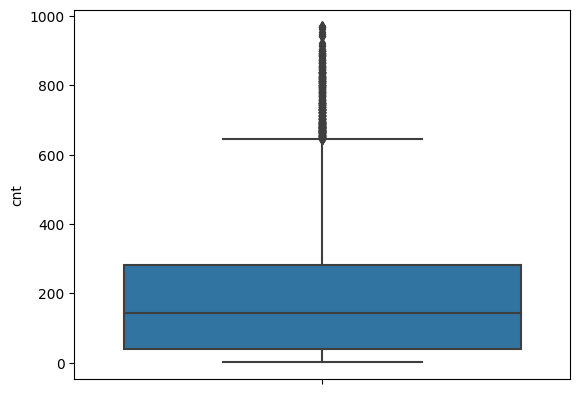

In [34]:
sns.boxplot(data=dfBike,
            y = 'cnt')

As we can see above, the Count of Total Customers has 0 values and most of them are centered in low number (under 300) compared to data range (0-1000).  
The MAPE could be big because in lower values, error in percentage will be big.  
If the actual data is 2 and the prediction is 10, it's 500%.  

So, we should transform the target into non zero sensitive scale.

### **Cnt with Logarithmic transformer from TransformedTargetRegressor**

In [ ]:
from sklearn.compose import TransformedTargetRegressor

In [57]:
log_linreg = TransformedTargetRegressor(linreg, func=np.log1p, inverse_func=np.expm1)
log_knnreg = TransformedTargetRegressor(knnreg, func=np.log1p, inverse_func=np.expm1)
log_treereg = TransformedTargetRegressor(treereg, func=np.log1p, inverse_func=np.expm1)
log_rfreg = TransformedTargetRegressor(rfreg, func=np.log1p, inverse_func=np.expm1)
log_svreg = TransformedTargetRegressor(svreg, func=np.log1p, inverse_func=np.expm1)
log_xgbreg = TransformedTargetRegressor(xgbreg, func=np.log1p, inverse_func=np.expm1)
log_ridgereg = TransformedTargetRegressor(ridgereg, func=np.log1p, inverse_func=np.expm1)
log_lassoreg = TransformedTargetRegressor(lassoreg, func=np.log1p, inverse_func=np.expm1)
log_gradientreg = TransformedTargetRegressor(gradientreg, func=np.log1p, inverse_func=np.expm1)
logModel = [log_linreg,log_knnreg,log_treereg,log_svreg,log_rfreg,log_xgbreg,log_ridgereg,log_lassoreg,log_gradientreg]
logModelName = ['log_linreg','log_knnreg','log_treereg','log_svreg','log_rfreg','log_xgbreg','log_ridgereg','log_lassoreg','log_gradientreg']

We use `func=np`.log1p to transform the Cnt to logarithmic but with +1 as the coefficient.  
So we can populate the Cnt with closer range but non zero (because of +1).  

After that, before doing evaluation, the data will be converted back to it's original scale with `inverse_func=np.expm1`

TransformedTargetRegressor is a wrapper or meta-estimator that allows for transforming the target variable before fitting a regression model. It applies a user-defined function (such as a logarithmic or exponential transformation) to the target variable during training and applies the inverse function during prediction. This can be useful when the target variable exhibits non-linear relationships or has skewed distributions. TransformedTargetRegressor helps to model the transformed target variable and provide predictions on the original scale, improving interpretability and handling specific target variable characteristics.

Hopefully, with non zero values and relatively close range of data, we can make the MAPE better.

<Axes: ylabel='cnt'>

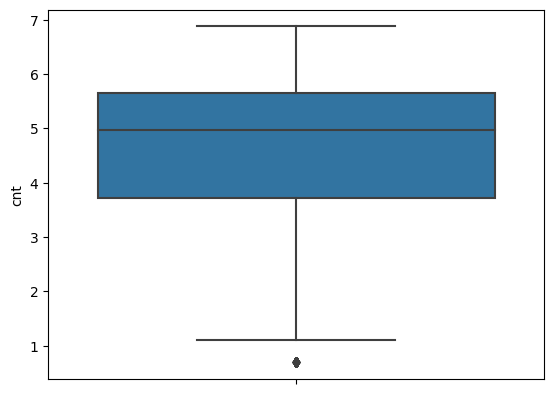

In [111]:
sns.boxplot(y = np.log1p(dfBike['cnt']))

This is the distribution of Cnt after processing it with `TransformedTargetRegressor()`

Now, let's do model benchmarkin or cross validation with new form of Cnt.

In [66]:
# kandidat model

listMAEall = []
listMAEmean = []
listMAEstd = []

listMAPEall = []
listMAPEmean = []
listMAPEstd = []

listMSEall = []
listMSEmean = []
listMSEstd = []

listRMSEall = []
listRMSEmean = []
listRMSEstd = []

for model in logModel :
    pipeModel = Pipeline([('prepro',transformer),
                          ('modeling', model)])
    cvScore = cross_validate(estimator=pipeModel,
                             X = xTrainBike,
                             y = yTrainBike,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'])
    listMAEall.append(cvScore['test_neg_mean_absolute_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEall.append(cvScore['test_neg_mean_absolute_percentage_error'])
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEall.append(cvScore['test_neg_mean_squared_error'])
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEall.append(cvScore['test_neg_root_mean_squared_error'])
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())

dfCVlog = pd.DataFrame()
dfCVlog['algo'] = logModelName
dfCVlog['MAEmean'] = listMAEmean
dfCVlog['MAEstd'] = listMAEstd
dfCVlog['MAEall'] = listMAEall
dfCVlog['MAPEmean'] = listMAPEmean
dfCVlog['MAPEstd'] = listMAPEstd
dfCVlog['MAPEall'] = listMAPEall
dfCVlog['MSEmean'] = listMSEmean
dfCVlog['MSEstd'] = listMSEstd
dfCVlog['MSEall'] = listMSEall
dfCVlog['RMSEmean'] = listRMSEmean
dfCVlog['RMSEstd'] = listRMSEstd
dfCVlog['RMSEall'] = listRMSEall
dfCVlog

,algo,MAEmean,MAEstd,MAEall,MAPEmean,MAPEstd,MAPEall,MSEmean,MSEstd,MSEall,RMSEmean,RMSEstd,RMSEall
0,log_linreg,-106.372762,1.824486,"[-105.21038738775371, -106.35071624708169, -10...",-1.418082,0.068039,"[-1.4819981880399034, -1.419214263010218, -1.5...",-26123.286074,578.822051,"[-25950.75923508213, -26090.34412513165, -2514...",-161.617016,1.796126,"[-161.0923934736899, -161.52505726707435, -158..."
1,log_knnreg,-55.893210,1.972509,"[-52.858741338076356, -56.393955498152806, -54...",-0.539176,0.043940,"[-0.5224247570758458, -0.5199035732832805, -0....",-8183.430728,433.231926,"[-7638.169417477161, -8081.5760595691, -7948.6...",-90.431064,2.377696,"[-87.3966213161422, -89.89758650580727, -89.15..."
2,log_treereg,-36.865432,1.607139,"[-34.257201646090536, -35.73713991769547, -37....",-0.382392,0.016659,"[-0.3720170314130463, -0.366132567411638, -0.4...",-3947.159053,367.322375,"[-3671.183127572017, -3357.597222222222, -4224...",-62.756131,2.971050,"[-60.59028905337898, -57.94477735070023, -64.9..."
3,log_svreg,-134.072901,4.717416,"[-126.69836706053991, -133.80619060591943, -13...",-5.037463,0.333712,"[-5.365510026526132, -5.044486558688967, -5.44...",-34371.241058,3001.873545,"[-29893.98446710373, -34210.615469468656, -327...",-185.216739,8.124072,"[-172.8987694204436, -184.96111880465216, -180..."
4,log_rfreg,-28.031108,1.077343,"[-26.0990188148912, -28.060138971490193, -28.8...",-0.277907,0.013190,"[-0.2672812476933069, -0.26969621884733663, -0...",-2202.610394,155.805366,"[-2018.5146021190628, -2059.9655974080597, -23...",-46.902835,1.653626,"[-44.927882234966994, -45.386843880226564, -48..."
5,log_xgbreg,-25.663127,0.916943,"[-23.96280523178018, -25.481189924411076, -26....",-0.245006,0.012760,"[-0.2391267222249872, -0.23821698975146696, -0...",-1838.429576,143.633142,"[-1652.8948774137475, -1710.5578220572706, -18...",-42.844111,1.676816,"[-40.65580988510434, -41.358890483876266, -42...."
6,log_ridgereg,-106.379965,1.835691,"[-105.17581243021215, -106.3535930485006, -103...",-1.418871,0.068320,"[-1.4826898751984536, -1.4203222712886026, -1....",-26116.916154,582.528354,"[-25925.40147639225, -26081.89628879136, -2514...",-161.597181,1.807512,"[-161.01366860112296, -161.49890491514597, -15..."
7,log_lassoreg,-130.734139,5.188880,"[-122.30556800524622, -132.44877537175597, -12...",-2.128896,0.112297,"[-2.2014824693698336, -2.108468721246205, -2.3...",-36640.194200,2718.199200,"[-32792.15668274501, -36938.487494711204, -344...",-191.283750,7.121880,"[-181.08604773075425, -192.193879961645, -185...."
8,log_gradientreg,-51.256978,0.851535,"[-49.7247357854733, -51.70377101483528, -51.13...",-0.421786,0.015555,"[-0.41813822612888774, -0.4141361253222215, -0...",-6918.459521,71.605921,"[-6847.008460379108, -7028.638238462278, -6836...",-83.176165,0.430163,"[-82.74665226085651, -83.83697417286885, -82.6..."


After doing TransformedTargetRegressor() to the Cnt, there's much improvement to MAPE score, even the MAE get better slightly.

Based on those cross validation above, we can conclude that  
`XGBRegressor()` is the best base model with 24.5% MAPE and 25.6 MAE  
followed by
`RandomForestRegressor()` with 27.7% MAPE and 28 MAE.

1. XGBRegressor:
XGBRegressor is an implementation of the gradient boosting framework called XGBoost. It builds an ensemble of weak prediction models, typically decision trees, in a sequential manner. It optimizes a loss function by minimizing errors and adding new models that correct the residuals of the previous models. XGBRegressor offers high predictive accuracy, handles complex relationships, and has advanced features such as regularization, handling missing values, and parallel processing.

2. RandomForestRegressor:
RandomForestRegressor is an ensemble learning method that constructs multiple decision trees and combines their predictions to make final predictions. Each decision tree is built on a random subset of features and trained independently. RandomForestRegressor is robust against overfitting, handles non-linear relationships, and performs well on high-dimensional data. It provides feature importance measures, allowing for insights into variable importance and interpretation.

Both models are suitable for regression tasks and have their strengths. XGBRegressor is known for its gradient boosting technique, which achieves high accuracy and offers various advanced options. RandomForestRegressor, on the other hand, builds an ensemble of decision trees, providing robustness against overfitting and ease of interpretation through feature importance analysis. The choice between the two depends on the specific requirements of the problem, the nature of the data, and the trade-offs between accuracy, interpretability, and computational resources.

**Let's hyper tune both of those best base models!**

## **Hypertuning Top Base Model**

### **XGBRegressor()**

The parameters in XGBRegressor() have specific meanings and impact the behavior of the XGBoost model in different ways:

1. `max_depth` controls the maximum depth of each decision tree in the ensemble. A higher value can make the model more complex and prone to overfitting, while a lower value can increase generalization but potentially underfit the data.
2. `learning_rate` determines the step size at each boosting iteration. A smaller value makes the learning slower but can improve generalization, while a larger value can lead to faster learning but increases the risk of overfitting.
3. `n_estimators` specifies the number of decision trees to be built in the ensemble. A higher value allows for a more complex model with potentially better performance, but it also increases the computational cost.

By changing these parameters, you can influence the behavior and performance of the XGBoost model:

- Increasing `max_depth` can make the model more expressive but increases the risk of overfitting. Decreasing it can improve generalization but may lead to underfitting.
- Adjusting `learning_rate` allows you to control the step size during gradient descent. Smaller values require more iterations to converge but can improve generalization.
- Changing `n_estimators` affects the number of decision trees in the ensemble. More trees can capture complex patterns but may lead to longer training times.

In [69]:
hyperParamXGB = {'model__regressor__max_depth': list(np.arange(2, 10)), 
                 'model__regressor__learning_rate': list(np.arange(1, 101, 10)/100),
                 'model__regressor__n_estimators': list(np.arange(200, 301, 20))}

pipeXGB = Pipeline([('Preprocess', transformer),
                    ('model',log_xgbreg)])

gridSearchXGB = GridSearchCV(estimator = pipeXGB,
                             param_grid = hyperParamXGB,
                             cv = 5,
                             scoring = ['neg_mean_absolute_error',
                                        'neg_mean_absolute_percentage_error',
                                        'neg_mean_squared_error',
                                        'neg_root_mean_squared_error'],
                             refit = 'neg_mean_absolute_percentage_error')

gridSearchXGB.fit(xTrainBike, yTrainBike)
display(gridSearchXGB.best_estimator_,
        gridSearchXGB.best_params_,
        gridSearchXGB.best_score_,
        pd.DataFrame(gridSearchXGB.cv_results_).sort_values(['rank_test_neg_mean_absolute_percentage_error',
                                                               'rank_test_neg_mean_absolute_error']))

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encodingOHE',
                                                  OneHotEncoder(),
                                                  ['weathersit', 'season',
                                                   'dayName'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None...
                                                                   gpu_id=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.11,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=6,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   n_estimators=300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   predictor=None,
                                                                   random_state=None, ...)))])

{'model__regressor__learning_rate': 0.11,
 'model__regressor__max_depth': 6,
 'model__regressor__n_estimators': 300}

-0.23563235920498832

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__learning_rate,param_model__regressor__max_depth,param_model__regressor__n_estimators,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
77,0.859932,0.007855,0.008264,0.000324,0.11,6,300,"{'model__regressor__learning_rate': 0.11, 'mod...",-22.314799,-23.363361,-25.221215,-25.185674,-24.347331,-24.086476,1.115854,19,-0.227806,-0.229804,-0.261242,-0.233275,-0.226035,-0.235632,0.013029,1,-1460.470444,-1436.415991,-1711.088440,-1828.116904,-1786.986998,-1644.615755,164.692136,19,-38.216102,-37.900079,-41.365305,-42.756484,-42.272769,-40.502148,2.047386,19
80,0.835024,0.016634,0.008172,0.000305,0.11,7,240,"{'model__regressor__learning_rate': 0.11, 'mod...",-22.260002,-23.418782,-24.646702,-24.611369,-23.609093,-23.709190,0.881743,10,-0.230127,-0.236906,-0.252167,-0.235006,-0.224282,-0.235697,0.009322,2,-1449.981265,-1432.574191,-1667.577071,-1725.944321,-1690.093152,-1593.234000,125.581477,13,-38.078620,-37.849362,-40.835978,-41.544486,-41.110743,-39.883838,1.585404,13
79,0.786204,0.030135,0.008249,0.000262,0.11,7,220,"{'model__regressor__learning_rate': 0.11, 'mod...",-22.276635,-23.503101,-24.684526,-24.714994,-23.623209,-23.760493,0.900204,14,-0.229719,-0.237038,-0.252264,-0.235302,-0.224470,-0.235758,0.009361,3,-1460.256844,-1433.292333,-1664.539377,-1735.054237,-1690.554260,-1596.739410,124.797028,17,-38.213307,-37.858847,-40.798767,-41.653982,-41.116350,-39.928251,1.572958,17
76,0.812721,0.024582,0.008034,0.000188,0.11,6,280,"{'model__regressor__learning_rate': 0.11, 'mod...",-22.357509,-23.441859,-25.338188,-25.185993,-24.396080,-24.143926,1.118922,20,-0.228440,-0.230539,-0.261385,-0.233376,-0.225537,-0.235856,0.013020,4,-1466.339089,-1449.646154,-1721.469699,-1831.802398,-1784.646114,-1650.780691,161.344075,20,-38.292807,-38.074219,-41.490598,-42.799561,-42.245072,-40.580451,2.001914,20
81,0.867005,0.026434,0.008020,0.000199,0.11,7,260,"{'model__regressor__learning_rate': 0.11, 'mod...",-22.235507,-23.399304,-24.604599,-24.588767,-23.674525,-23.700540,0.876814,9,-0.230726,-0.237158,-0.252263,-0.234912,-0.224717,-0.235955,0.009188,5,-1451.119456,-1431.077401,-1662.537053,-1727.728055,-1703.169032,-1595.126199,127.632817,16,-38.093562,-37.829584,-40.774220,-41.565948,-41.269469,-39.906557,1.610262,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0.324808,0.001370,0.006127,0.000195,0.01,2,260,"{'model__regressor__learning_rate': 0.01, 'mod...",-90.038844,-99.682941,-96.426944,-104.322183,-104.870294,-99.068241,5.480001,468,-0.650703,-0.658618,-0.731976,-0.663235,-0.698918,-0.680690,0.030508,476,-22582.468877,-26636.577219,-25125.752172,-28468.931618,-30415.268

The `XGBRegressor()` get improved MAPE and MAE score.  
with 23.5% MAPE and 24 MAE.

### **RandomForestRegressor()**

The parameters in RandomForestRegressor() have specific meanings and impact the behavior of the Random Forest model:

1. `n_estimators` determines the number of decision trees to be built in the forest. Increasing the value can improve performance up to a certain point, as more trees provide a stronger ensemble. However, it also increases the computational cost.
2. `max_depth` sets the maximum depth of each decision tree. A higher value can make the trees more complex and prone to overfitting, while a lower value can increase generalization but potentially underfit the data. Using `None` allows the trees to expand until all leaves are pure or contain a minimum number of samples.
3. `min_samples_split` specifies the minimum number of samples required to split an internal node. Increasing this value can prevent overfitting and lead to simpler trees but might sacrifice some performance.
4. `min_samples_leaf` sets the minimum number of samples required to be at a leaf node. Similar to `min_samples_split`, increasing this value can help control overfitting and result in more generalizable trees.
5. `max_features` determines the number of features to consider when looking for the best split at each node. Using a float value like `1.0` means considering all features, while `'sqrt'` refers to the square root of the total number of features. Limiting the number of features can reduce the correlation among trees and improve diversity.
6. `bootstrap` specifies whether bootstrap samples should be used when building trees. Setting it to `True` means using bootstrapping, which introduces randomness and can lead to more diverse trees.

By tuning these parameters, you can control the behavior and performance of the Random Forest model:

- Adjusting `n_estimators` and `max_depth` can impact the complexity of the forest and its ability to fit the training data.
- Modifying `min_samples_split` and `min_samples_leaf` can control the stopping criteria for tree growth and prevent overfitting.
- Changing `max_features` and `bootstrap` affects the randomness and diversity of the trees in the ensemble.

In [40]:
hyperParamRF = {'model__regressor__n_estimators': [100, 200, 300],  # Number of decision trees in the random forest
                'model__regressor__max_depth': [None, 5, 10],  # Maximum depth of each decision tree
                'model__regressor__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
                'model__regressor__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
                'model__regressor__max_features': [1.0, 'sqrt'],  # Number of features to consider when looking for the best split
                'model__regressor__bootstrap': [True, False]}  # Whether to use bootstrapping when building trees

pipeRF = Pipeline([('Preprocess', transformer),
                    ('model',log_rfreg)])

randomSearchRF = RandomizedSearchCV(estimator = pipeRF,
                                     param_distributions = hyperParamRF,
                                     cv = 5,
                                     scoring = ['neg_mean_absolute_error',
                                                'neg_mean_absolute_percentage_error',
                                                'neg_mean_squared_error',
                                                'neg_root_mean_squared_error'],
                                     n_iter = 10,
                                     refit = 'neg_mean_absolute_percentage_error',
                                     random_state=99)

randomSearchRF.fit(xTrainBike, yTrainBike)
display(randomSearchRF.best_estimator_,
        randomSearchRF.best_params_,
        randomSearchRF.best_score_,
        pd.DataFrame(randomSearchRF.cv_results_).sort_values(['rank_test_neg_mean_absolute_percentage_error',
                                                               'rank_test_neg_mean_absolute_error']))

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encodingOHE',
                                                  OneHotEncoder(),
                                                  ['weathersit', 'season',
                                                   'month', 'hr',
                                                   'dayName'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=RandomForestRegressor(min_samples_leaf=2,
                                                                            n_estimators=200)))])

{'model__regressor__n_estimators': 200,
 'model__regressor__min_samples_split': 2,
 'model__regressor__min_samples_leaf': 2,
 'model__regressor__max_features': 1.0,
 'model__regressor__max_depth': None,
 'model__regressor__bootstrap': True}

-0.31034255087418483

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__n_estimators,param_model__regressor__min_samples_split,param_model__regressor__min_samples_leaf,param_model__regressor__max_features,param_model__regressor__max_depth,param_model__regressor__bootstrap,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
5,39.698268,0.213589,0.105716,0.001538,200,2,2,1.0,None,True,"{'model__regressor__n_estimators': 200, 'model...",-30.156755,-32.002126,-33.612700,-33.900794,-31.955416,-32.325558,1.347844,1,-0.300898,-0.302579,-0.327177,-0.321676,-0.299382,-0.310343,0.011675,1,-2677.158882,-2767.638105,-3142.727807,-3040.436421,-2855.435087,-2896.679260,171.899917,1,-51.741269,-52.608346,-56.060038,-55.140153,-53.436271,-53.797215,1.593390,1
7,22.335610,0.127271,0.052150,0.000272,100,10,2,1.0,None,False,"{'model__regressor__n_estimators': 100, 'model...",-35.619660,-38.651386,-40.233576,-39.465360,-39.558314,-38.705659,1.622654,2,-0.369430,-0.396867,-0.402746,-0.392148,-0.381293,-0.388497,0.011848,2,-3758.256135,-4094.853465,-4741.631909,-4313.791909,-4382.878189,-4258.282321,325.259111,2,-61.304618,-63.991042,-68.859508,-65.679463,-66.203309,-65.207588,2.500552,2
1,16.477875,0.057947,0.152646,0.000870,300,5,2,sqrt,None,False,"{'model__regressor__n_estimators': 300, 'model...",-42.375489,-46.353025,-46.390275,-47.498120,-46.033172,-45.730016,1.749001,3,-0.404322,-0.402959,-0.459667,-0.427078,-0.414683,-0.421742,0.020846,3,-4998.912259,-5647.949508,-5764.161485,-5779.959969,-5627.395007,-5563.675646,288.822923,3,-70.702986,-75.152841,-75.922075,-76.026048,-75.015965,-74.563983,1.971821,3
2,5.932656,0.004207,0.084910,0.000723,200,5,4,sqrt,None,True,"{'model__regressor__n_estimators': 200, 'model...",-52.992610,-57.252033,-56.136874,-58.426600,-58.008512,-56.563326,1.947642,4,-0.521947,-0.510404,-0.578440,-0.539543,-0.536613,-0.537390,0.023052,4,-7559.528787,-8468.747980,-8295.217846,-8628.198942,-9110.645123,-8412.467736,505.650368,4,-86.945551,-92.025801,-91.078087,-92.888099,-95.449699,-91.677447,2.777301,4
9,12.870370,0.179798,0.075547,0.000515,300,5,4,1.0,10,False,"{'model__regressor__n_estimators': 300, 'model...",-77.000954,-82.109565,-79.326837,-83.547414,-85.940254,-81.585005,3.137108,5,-0.673901,-0.629892,-0.676638,-0.639107,-0.724418,-0.668791,0.033396,5,-15056.018540,-16808.165457,-15812.941356,-17457.436594,-19298.945669,-16886.701523,1459.807476,5,-122.702969,-129.646309,-125.749518,-132.126593,-138.920645,-129.829207,5.574815,5
0,3.256675,0.096528,0.087095,0.006811,300,2,1,sqrt,10,True,"{'model__regressor__n_estimators': 300, 'model...",-76.332518,-84.785201,-82.182524,-87.774361,-87.427744,-83.700470,4.201349,6,-0.852745,-0.826970,-0.952487,-0.879652,-0.879470,-0.878265,0.041940,6,-15704.873753,-18553.976659,-17493.444434,-19179.0912

Meanwhile the RandomForestRegressor() get lower score after hyper tuning.  
With 31% MAPE and 32 MAE.

### **Summary: XGBRegressor() vs RandomForestRegressor()**

Now, let's compare all version of the selected models to find which one has best stability in predicting the total customers (Cnt).

In [70]:
# kandidat model

listMAEmean = []
listMAEstd = []

listMAPEmean = []
listMAPEstd = []

listMSEmean = []
listMSEstd = []

listRMSEmean = []
listRMSEstd = []

tuned_xgbreg = gridSearchXGB.best_estimator_
tuned_rfreg = randomSearchRF.best_estimator_

baseModel = [log_xgbreg,
            log_rfreg]
tunedModel = [tuned_xgbreg,
              tuned_rfreg]

baseModelName = ['log_xgbreg',
                 'log_rfreg']
tunedModelName = ['tuned_xgbreg',
                  'tuned_rfreg']

for model in baseModel :
    pipeModel = Pipeline([('prepro',transformer),
                          ('modeling', model)])
    cvScore = cross_validate(estimator=pipeModel,
                             X = xTrainBike,
                             y = yTrainBike,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())

for model in tunedModel :
    cvScore = cross_validate(estimator=model,
                             X = xTrainBike,
                             y = yTrainBike,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'])
    listMAEall.append(cvScore['test_neg_mean_absolute_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEall.append(cvScore['test_neg_mean_absolute_percentage_error'])
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEall.append(cvScore['test_neg_mean_squared_error'])
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEall.append(cvScore['test_neg_root_mean_squared_error'])
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())



dfCVbest = pd.DataFrame()
dfCVbest['algo'] = baseModelName + tunedModelName
dfCVbest['MAEmean'] = listMAEmean
dfCVbest['MAEstd'] = listMAEstd
dfCVbest['MAPEmean'] = listMAPEmean
dfCVbest['MAPEstd'] = listMAPEstd
dfCVbest['MSEmean'] = listMSEmean
dfCVbest['MSEstd'] = listMSEstd
dfCVbest['RMSEmean'] = listRMSEmean
dfCVbest['RMSEstd'] = listRMSEstd
dfCVbest

,algo,MAEmean,MAEstd,MAPEmean,MAPEstd,MSEmean,MSEstd,RMSEmean,RMSEstd
0,log_xgbreg,-25.663127,0.916943,-0.245006,0.012760,-1838.429576,143.633142,-42.844111,1.676816
1,log_rfreg,-28.102597,1.133926,-0.275555,0.013531,-2207.340380,173.767795,-46.946254,1.841100
2,tuned_xgbreg,-24.086476,1.115854,-0.235632,0.013029,-1644.615755,164.692136,-40.502148,2.047386
3,tuned_rfreg,-32.419624,1.473508,-0.311146,0.011178,-2920.256737,205.856694,-54.005808,1.905117


Here, we compare all version of selected models.  
We can conclude that the hypertuned version of `XGBRegressor()` is the best model.

In [71]:
display(tuned_xgbreg,
        gridSearchXGB.best_params_)

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encodingOHE',
                                                  OneHotEncoder(),
                                                  ['weathersit', 'season',
                                                   'dayName'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None...
                                                                   gpu_id=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.11,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=6,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   n_estimators=300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   predictor=None,
                                                                   random_state=None, ...)))])

{'model__regressor__learning_rate': 0.11,
 'model__regressor__max_depth': 6,
 'model__regressor__n_estimators': 300}

This is our best model in estimator format, complete with its parameter combination (based on hypertune selection)

Now, let's test it to the data test set to find that our best model can predict non training data well.

## **Fit to Test Set**

Fitting the selected model to the test set allows us to evaluate its performance on unseen data and verify its generalization ability.  
It provides an unbiased estimate of how well the model performs and helps in decision making for deployment or further improvements.

In [222]:
tuned_xgbreg.fit(xTrainBike,yTrainBike)
yPredBike = tuned_xgbreg.predict(xTestBike)
scoreAccTrain = tuned_xgbreg.score(xTrainBike,yTrainBike)
scoreMAPEtest = mean_absolute_percentage_error(yTestBike,yPredBike)
scoreMAEtest = mean_absolute_error(yTestBike,yPredBike)
scoreMSEtest = mean_squared_error(yTestBike,yPredBike)
scoreRMSEtest = np.sqrt(mean_squared_error(yTestBike,yPredBike))

dfTestScore = pd.DataFrame({'Model' : ['tuned_xgbreg'],
                           'scoreAccTrain' : [scoreAccTrain],
                           'scoreMAEtest' : [scoreMAEtest],
                           'scoreMAPEtest' : [scoreMAPEtest],
                           'scoreMSEtest' : [scoreMSEtest],
                           'scoreRMSEtest' : [scoreRMSEtest]})
dfTestScore

,Model,scoreAccTrain,scoreMAEtest,scoreMAPEtest,scoreMSEtest,scoreRMSEtest
0,tuned_xgbreg,0.978136,23.067434,0.223276,1451.567146,38.099438


The performance of the best model is good, because the MAPE in test set is slightly better than the training.  
We can say that this tuned `XGBRegressor()` is good at capturing data outside train data.

Now, let's take a look into data plot of the prediction compared to actual data.

### **Prediction: Visualization**

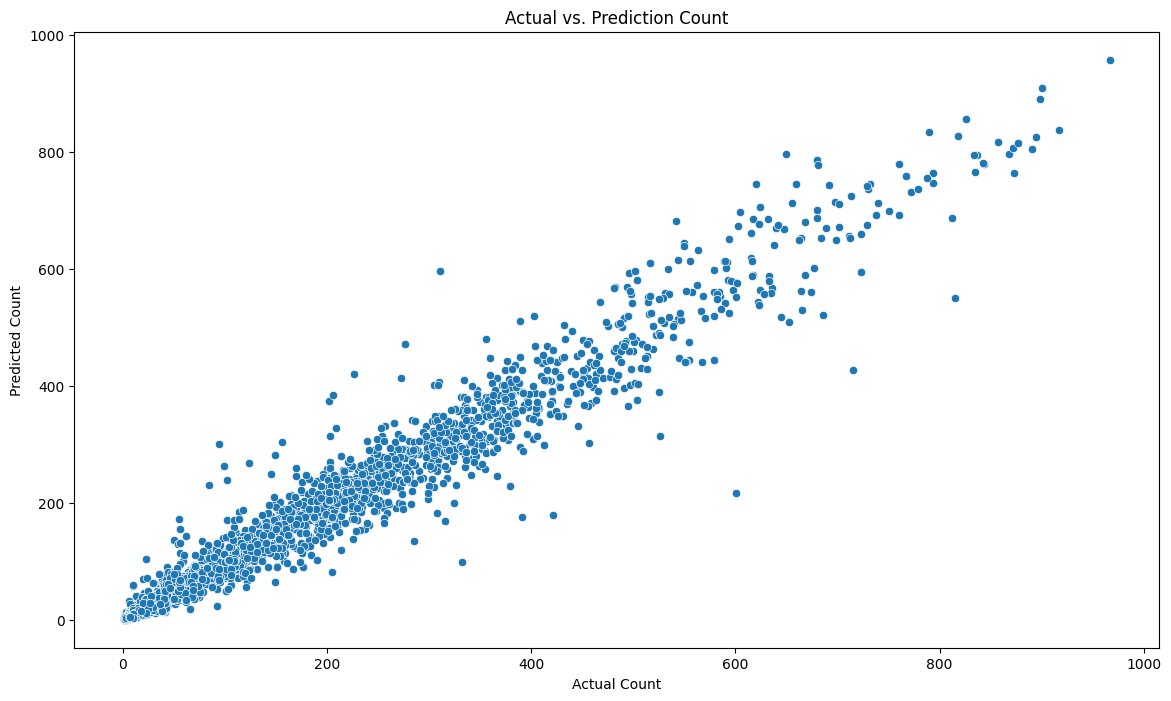

In [73]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=yTestBike, y=yPredBike).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count')

We can see here that the prediction makes a clear regression pattern. but there are  some data that are overestimated / undersetimated that makes the MAPE quite big when compared relatively to MAPE.

### **Prediction: Residual Analysis**

In summary, residual analysis and visualization provide insights into model performance, assumptions, outliers, and areas for improvement.
- Residual analysis and visualization help assess the quality of the regression model.
- Residual plots can detect outliers and influential points.

In [74]:
residual = yTestBike - yPredBike

dfResidual = pd.DataFrame({'yPredBike': yPredBike,
                           'residual': residual})

dfResidualFull = pd.DataFrame({'yTestBike': yTestBike,
                               'yPredBike': yPredBike,
                               'residual': residual})
display(dfResidualFull,
        dfResidual)

,yTestBike,yPredBike,residual
6318,214,231.171066,-17.171066
7924,149,65.253899,83.746101
7586,20,21.655439,-1.655439
4772,124,134.065567,-10.065567
6095,190,185.632812,4.367188
...,...,...,...
11406,740,713.773804,26.226196
3902,94,86.791161,7.208839
11204,367,294.254761,72.745239
2792,420,392.491150,27.508850


,yPredBike,residual
6318,231.171066,-17.171066
7924,65.253899,83.746101
7586,21.655439,-1.655439
4772,134.065567,-10.065567
6095,185.632812,4.367188
...,...,...
11406,713.773804,26.226196
3902,86.791161,7.208839
11204,294.254761,72.745239
2792,392.491150,27.508850


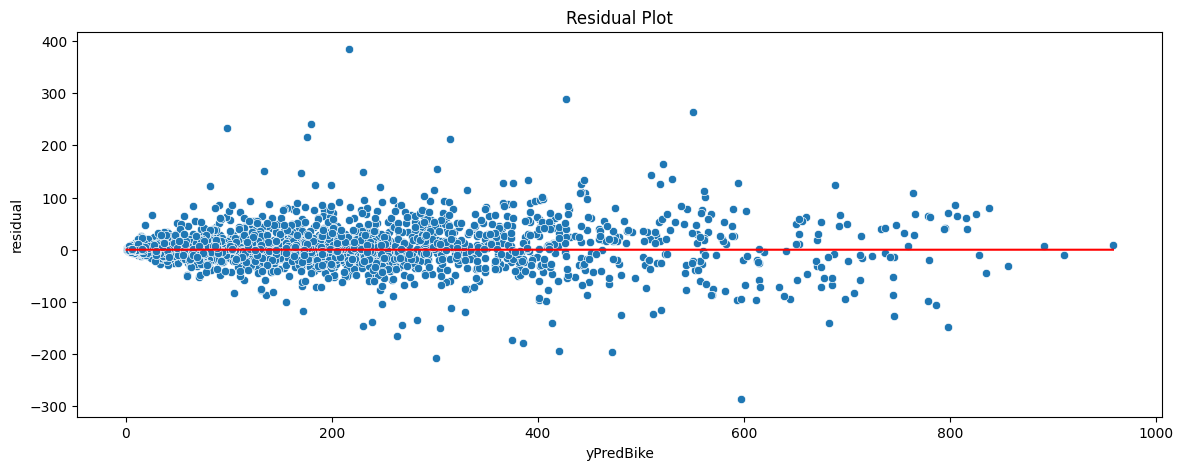

In [75]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=dfResidual, x='yPredBike', y='residual')
sns.lineplot(data=dfResidual, x='yPredBike', y=0, color='red')
plt.title('Residual Plot')
plt.show()

We can see the reason of MAPE being quite big ~22% here. There are some prediction that has big difference / residual that when we apply percentage to it, will make a big percentage, especially in low number of total customers.  
But when we see it in MAE ~23, this shows good consistency of the predicted data and relatively good when compared to total customers data that ranged from 0 to 1000.

### **Feature Importances**

In summary, feature importances assist in feature selection, model interpretation, detecting data issues, and driving feature engineering for better model performance and decision-making.
- Feature importances help select relevant features for improved model performance.
- They provide insights into the driving factors behind the model's predictions.
- Feature importances aid in interpreting and explaining the model to stakeholders.
- They can highlight data issues or unexpected relationships between features and the target.
- Feature importances inspire feature engineering efforts to enhance model performance.
- Analyzing feature importances supports the decision-making process throughout the machine learning pipeline.

<Axes: title={'center': 'Feature Importances'}>

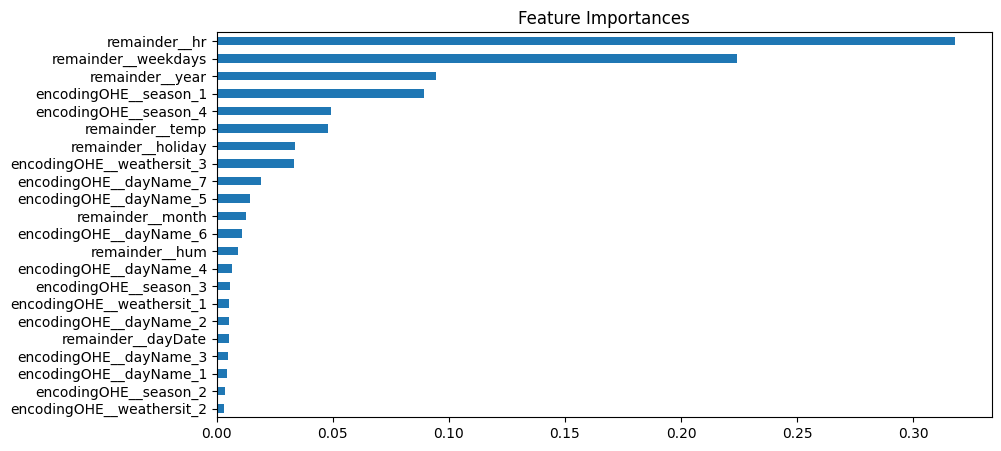

In [188]:
featureImp = pd.Series(tuned_xgbreg['model'].regressor_.feature_importances_, transformer.get_feature_names_out()).sort_values()
plt.figure(figsize=(10,5))
featureImp.plot(kind='barh', title='Feature Importances')

In this tuned `XGBRegressor()`, feature that has biggest impact to total customers are:
1. time of rent (hour)
2. is it a weekdays or not
3. year
4. and some seasons.
5. temperature

# **Conclusion**

Based on model benchmarking score we got `XGBRegressor()` (with ~24.5% MAPE and ~25.6 MAE) and `RandomForestRegressor()` (with ~27.7% MAPE and ~28 MAE) as the top models.  
Then, we do hyperparameter tuning to both of them and we got the tuned version of `XGBRegressor()` as the best model (with ~23.5% MAPE and ~24 MAE).  
After we fit it into Test Set, it got even better with ~22% MAPE and ~23 MAE. This means, that the model we selected is good at predicting data outside the train set and can be good / stable in predicting new data later.   
Our train data range is from 1 total customers to 970 total customers max, which means the model is good at predicting data inside this range and could become less accurate to predict outside this data.  
MAPE here is the main metric we use in choosing the best model because it's the most easiest to intepret by human.  
In our final model, it means that the model can guess the total customers with error approximately ~22%. It still seems like a big number of error, but we can justify our model by looking at MAE, which means that the model, by real value, missed approximately ~23 points from actual numbers.  It could become a big percentage of error if we're predicting low number of total customers (if the actual is 10 customers, then might be predicted as 33 customers - big percentage). But, if we are predicting high number of total customers, the model can be more accurate (if the actual is 500 customers, then might be predicted as 523 customers - small percentage).  

Back again, The MAPE is still quite big because low number of customers can't be predicted as accurate as high number of customers. This because the features we have in this modeling is limited and can make bias.

If we look at feature importances, we can see that time of rent (hour), weekdays status, year, seasons, and temperature is the main variables that shape the prediction. This could help the Capital Bikeshare's Business Strategic Team to forecast next year's total customers. We only have 2 years in the data. the pattern of predictions could be the same based on other features, but if we look at the year, it's rising. So, next year might be predicted to rise in order of total customers.  

Capital Bikeshare's Business Strategic Team also wants to expand to other location. We can see here that now they can predict based on those variables to get the potential total customers with this model. But, the prediction ignores most of location features, only temperature, humidity, and weather can describe other location. Meanwhile, that's not the highest impactful feature to the model.

But, this model still can be improved in order to minimize the big MAPE because the data seems to predict more accurately in higher numbers if we justify it by MAE.

# **Recommendation**

Here are some recommendations based on our model selection:
1. Because we know that the low number can be predicted less accurate then high number, we can do more further look into what makes the low number be predicted less accurate. Our features in this regression mostly are categorical features which can derives a pattern. The less accurate low number might be because there are some confusing pattern among the features. By knowing what features confuse the learning, we can do more in depth feature engineering to those features.  

2. Based on first data set we can see that the feature is limited. Especially, most of the features are time based features. The only non time based features are temperature, humidity, and weather. Those are environmental variable. We can add more variable that can represent the environtment so the model can predict about other locations (expanding business) more accurately. Also, if we want to predict other locations, population information like demography or population density could be added. Because it could also impact the total customers.  

3. This selected model: Tuned version of `XGBRegressor()` will be used by Capital Bikeshare's Business Strategic Team. The model is better to use to predict total customers in range of 1 customer to 970 customers at max.

4. This model migth can be improved using more complex model, like doing ensemble to several models or complex model like Recursive Neural Networks (RNN) to more minimize the error. But still, the features needs to be added more.

5. Actually, we still have other potential exploration using this dataset. We actually has 3 potential target, which are `Registered` + `Casual` = `Cnt`. We can try to predict using one of those targets or even combine them all for other possible way of predicting.
    - I will try to simulate this recommendation in brief.

let's save our best model first.

In [214]:
# Save model
import pickle

estimator = tuned_xgbreg
estimator.fit(xTrainBike, yTrainBike)

pickle.dump(estimator, open('Model_Bikeshare_XGB.sav', 'wb'))

In [216]:
# Load model
filename = 'Model_Bikeshare_XGB.sav'
loadedModel = pickle.load(open(filename, 'rb'))
loadedModel

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encodingOHE',
                                                  OneHotEncoder(),
                                                  ['weathersit', 'season',
                                                   'dayName'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None...
                                                                   gpu_id=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.11,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=6,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   n_estimators=300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   predictor=None,
                                                                   random_state=None, ...)))])

In [220]:
# Run Test Model
display('MAPE',
        mean_absolute_percentage_error(yTestBike, loadedModel.predict(xTestBike)),
        'MAE',
        mean_absolute_error(yTestBike, loadedModel.predict(xTestBike)))

'MAPE'

0.22327572988143632

'MAE'

23.067433564347134

**Exporting and Loading model is successful. The results are the same**

## **5. How about combining other potential Y like 'Registered' + 'Casual' = 'Cnt' ? in brief**

In [202]:
xBike = dfBike.drop(['cnt','registered','casual','dteday','atemp'],axis = 1)
yBikeCnt = dfBike['cnt']

xTrainBikeCnt, xTestBikeCnt, yTrainBikeCnt, yTestBikeCnt = train_test_split(xBike,
                                                                yBikeCnt,
                                                                random_state = 99,
                                                                test_size = 0.2)

yTrainBikeRegis = dfBike['registered'][yTrainBikeCnt.index]
yTrainBikeCasual = dfBike['casual'][yTrainBikeCnt.index]

In [203]:
listModel = [log_linreg,log_knnreg,log_treereg,log_svreg,log_rfreg,log_xgbreg]
listModelName = ['log_linreg','log_knnreg','log_treereg','log_svreg','log_rfreg','log_xgbreg']

listMAEcomb = []

listMAPEcomb = []

listMSEcomb = []

listRMSEcomb = []

for model in listModel :
    pipeModelCas = Pipeline([('prepro',transformer),
                        ('modeling', model)])
    pipeModelReg = Pipeline([('prepro',transformer),
                        ('modeling', model)])
    
    pipeModelCas.fit(xTrainBikeCnt,yTrainBikeCasual)
    yPredBikeCas = pipeModelCas.predict(xTrainBikeCnt)
    pipeModelReg.fit(xTrainBikeCnt,yTrainBikeRegis)
    yPredBikeReg = pipeModelReg.predict(xTrainBikeCnt)
    yPredBikeCnt = yPredBikeCas + yPredBikeReg
    
    listMAPEcomb.append(round(mean_absolute_percentage_error(yTrainBikeCnt,yPredBikeCnt),3))
    listMAEcomb.append(round(mean_absolute_error(yTrainBikeCnt,yPredBikeCnt),3))
    listMSEcomb.append(round(mean_squared_error(yTrainBikeCnt,yPredBikeCnt),3))
    listRMSEcomb.append(round(np.sqrt(mean_squared_error(yTrainBikeCnt,yPredBikeCnt)),3))

dfCVcomb = pd.DataFrame()
dfCVcomb['algo'] = listModelName
dfCVcomb['MAEcomb'] = listMAEcomb
dfCVcomb['MAPEcomb'] = listMAPEcomb
dfCVcomb['MSEcomb'] = listMSEcomb
dfCVcomb['RMSEcomb'] = listRMSEcomb
dfCVcomb

,algo,MAEcomb,MAPEcomb,MSEcomb,RMSEcomb
0,log_linreg,105.223,1.392,25716.689,160.364
1,log_knnreg,42.088,0.361,4974.141,70.528
2,log_treereg,0.000,0.000,0.000,0.000
3,log_svreg,133.717,4.587,35277.320,187.823
4,log_rfreg,9.566,0.087,279.950,16.732
5,log_xgbreg,16.430,0.134,753.238,27.445


In [167]:
gridSearchXGB.best_params_

{'model__regressor__learning_rate': 0.11,
 'model__regressor__max_depth': 6,
 'model__regressor__n_estimators': 300}

In [168]:
tuned_xgbreg_wparams = XGBRegressor(learning_rate = 0.11,
                                    max_depth = 6,
                                    n_estimators = 300)

In [204]:
listModel = [log_rfreg,tuned_xgbreg_wparams]
listModelName = ['log_rfreg','tuned_xgbreg']

listMAEcomb = []

listMAPEcomb = []

listMSEcomb = []

listRMSEcomb = []

for model in listModel :
    pipeModelCas = Pipeline([('prepro',transformer),
                        ('modeling', model)])
    pipeModelReg = Pipeline([('prepro',transformer),
                        ('modeling', model)])
    
    pipeModelCas.fit(xTrainBikeCnt,yTrainBikeCasual)
    yPredBikeCas = pipeModelCas.predict(xTrainBikeCnt)
    pipeModelReg.fit(xTrainBikeCnt,yTrainBikeRegis)
    yPredBikeReg = pipeModelReg.predict(xTrainBikeCnt)
    yPredBikeCnt = yPredBikeCas + yPredBikeReg
    
    listMAPEcomb.append(round(mean_absolute_percentage_error(yTrainBikeCnt,yPredBikeCnt),3))
    listMAEcomb.append(round(mean_absolute_error(yTrainBikeCnt,yPredBikeCnt),3))
    listMSEcomb.append(round(mean_squared_error(yTrainBikeCnt,yPredBikeCnt),3))
    listRMSEcomb.append(round(np.sqrt(mean_squared_error(yTrainBikeCnt,yPredBikeCnt)),3))

dfCVcomb = pd.DataFrame()
dfCVcomb['algo'] = listModelName
dfCVcomb['MAEcomb'] = listMAEcomb
dfCVcomb['MAPEcomb'] = listMAPEcomb
dfCVcomb['MSEcomb'] = listMSEcomb
dfCVcomb['RMSEcomb'] = listRMSEcomb
dfCVcomb

,algo,MAEcomb,MAPEcomb,MSEcomb,RMSEcomb
0,log_rfreg,9.616,0.087,278.748,16.696
1,tuned_xgbreg,14.574,0.244,500.614,22.374


In [208]:
pipeModelCas = Pipeline([('prepro',transformer),
                    ('modeling', log_rfreg)])
pipeModelReg = Pipeline([('prepro',transformer),
                    ('modeling', log_rfreg)])

pipeModelCas.fit(xTrainBikeCnt,yTrainBikeCasual)
yPredBikeCas = pipeModelCas.predict(xTestBikeCnt)
pipeModelReg.fit(xTrainBikeCnt,yTrainBikeRegis)
yPredBikeReg = pipeModelReg.predict(xTestBikeCnt)
yPredBikeCnt = yPredBikeCas + yPredBikeReg

scoreMAPEtest = round(mean_absolute_percentage_error(yTestBikeCnt,yPredBikeCnt),3)
scoreMAEtest = round(mean_absolute_error(yTestBikeCnt,yPredBikeCnt),3)
scoreMSEtest = round(mean_squared_error(yTestBikeCnt,yPredBikeCnt),3)
scoreRMSEtest = round(np.sqrt(mean_squared_error(yTestBikeCnt,yPredBikeCnt)),3)

dfTestScore = pd.DataFrame({'Model' : ['log_rfreg'],
                           'scoreMAEtest' : [scoreMAEtest],
                           'scoreMAPEtest' : [scoreMAPEtest],
                           'scoreMSEtest' : [scoreMSEtest],
                           'scoreRMSEtest' : [scoreRMSEtest]})
dfTestScore

,Model,scoreMAEtest,scoreMAPEtest,scoreMSEtest,scoreRMSEtest
0,log_rfreg,25.893,0.252,1826.901,42.742


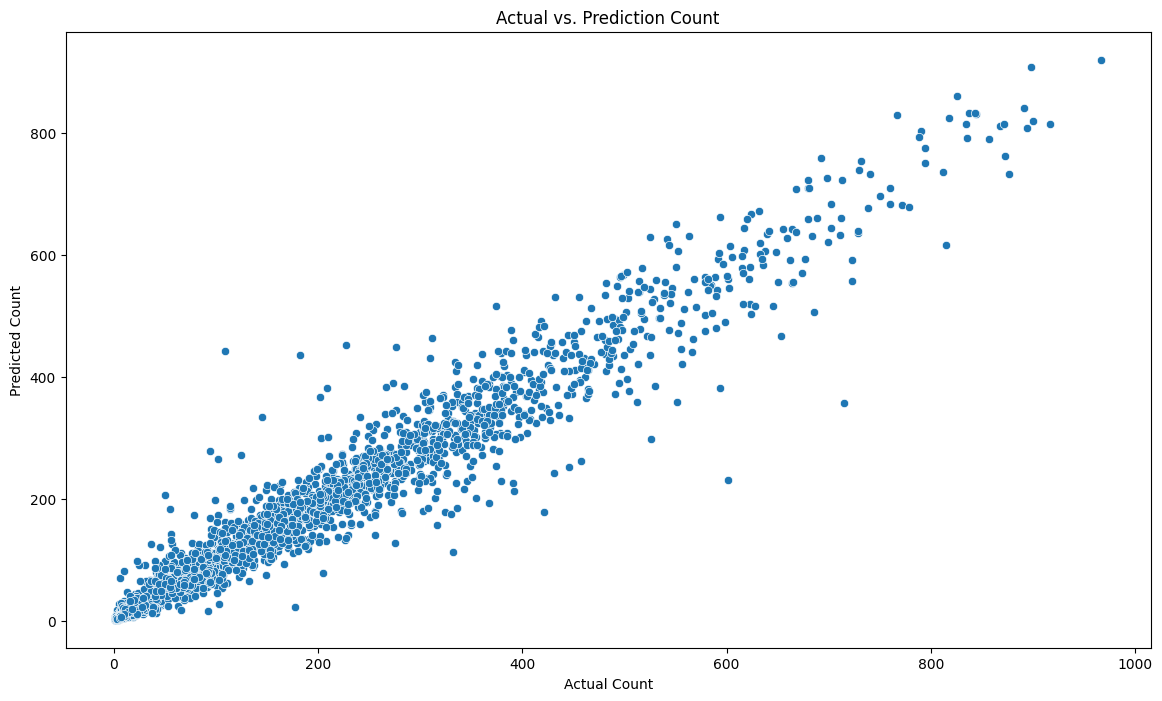

In [206]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=yTestBikeCnt, y=yPredBikeCnt).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count')

In [209]:
residual = yTestBikeCnt - yPredBikeCnt

dfResidual = pd.DataFrame({'yPredBike': yPredBikeCnt,
                           'residual': residual})

dfResidualFull = pd.DataFrame({'yTestBike': yTestBikeCnt,
                               'yPredBike': yPredBikeCnt,
                               'residual': residual})
display(dfResidualFull,
        dfResidual)

,yTestBike,yPredBike,residual
6318,214,205.704214,8.295786
7924,149,76.687521,72.312479
7586,20,21.019356,-1.019356
4772,124,135.029939,-11.029939
6095,190,204.434287,-14.434287
...,...,...,...
11406,740,734.699724,5.300276
3902,94,67.628844,26.371156
11204,367,305.664335,61.335665
2792,420,405.283090,14.716910


,yPredBike,residual
6318,205.704214,8.295786
7924,76.687521,72.312479
7586,21.019356,-1.019356
4772,135.029939,-11.029939
6095,204.434287,-14.434287
...,...,...
11406,734.699724,5.300276
3902,67.628844,26.371156
11204,305.664335,61.335665
2792,405.283090,14.716910


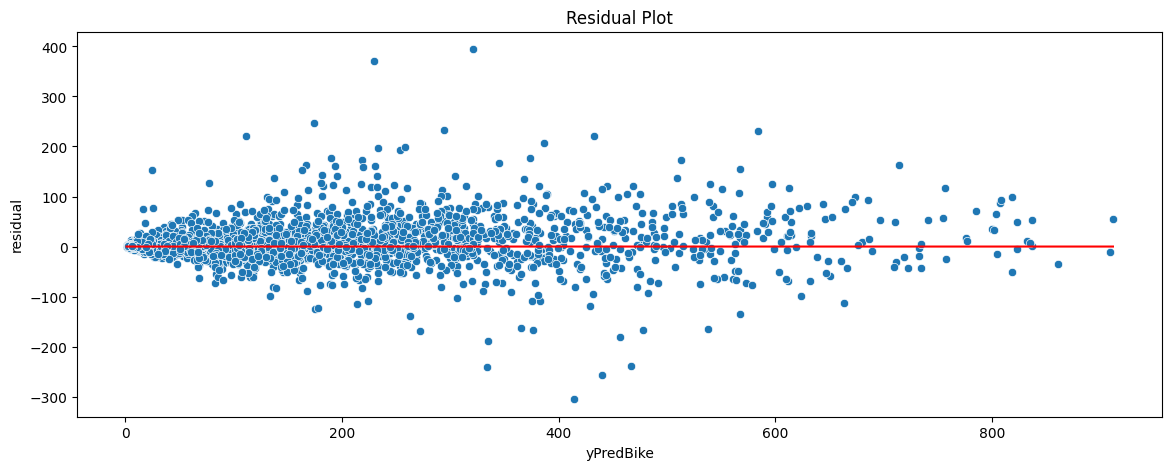

In [210]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=dfResidual, x='yPredBike', y='residual')
sns.lineplot(data=dfResidual, x='yPredBike', y=0, color='red')
plt.title('Residual Plot')
plt.show()

**Overall, there's no significant error minimization. The model selected is base RandomForestRegressor() with logartihmic transformation. But it tends to overfit because the MAPE in train was ~8% and in test was ~25%**  
This is just a brief exploration using this other way. We can furhter more explore feature engineering / selection, model selection using more in depth strategy like using cross validation and hypertune the model.  
This way, we can create more combination of model used in the final model. It can be a different model used in predicting `Registered` and `Casual`, we can explore it one by one.  
This could be another perspective if anyone would like to do modeling with this dataset.